# Załącznik nr 3: Przekształcanie danych oraz budowa modeli predykcji

In [44]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import time
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# ZMIANA DANYCH

In [1]:
df = pd.read_excel ("C:/Users/pawel/Desktop/mgrpython/2022_06_04mgrpython.xlsx")

NameError: name 'pd' is not defined

In [ ]:
df

In [ ]:
dfj = df.loc[df["RODZAJ_OBIEKTU"] == "Dom - do pojedynczego wykorzystania"]

In [ ]:
dfj

In [ ]:
dfj = df.drop(columns=["FRS_TERYTORIUM", "E_KOD_TERYTORIUM", "ROK_FINANSOWY", "Unnamed: 4","EWAKUOWANI", "OBSZAR USZKODZONY PRZEZ POŻAR_ORAZ_WODĘ", "KOD_CZAS_ODPOWIEDZI", "OBSZAR USZKODZONY PRZEZ POŻAR", "PERSONEL", "POJAZDY_STRAŻY", "RODZAJ_OBIEKTU", "CZAS_ODPOWIEDZI", "CZAS_INCYDENTU", "ZASIĘG_POŻARU_PO_ZGASZENIU", "PRZYCZYNA_POŻARU" ])

In [7]:
##Zmiana wartości nominalnych 0/1
dfj['SPECJALNA_BUDOWA_OBIEKTU'].mask(dfj['SPECJALNA_BUDOWA_OBIEKTU'] != 0, 1, inplace=True)
dfj['CZY_BUDYNEK_JEST_NORMALNIE_ZAJĘTY'].mask(dfj['CZY_BUDYNEK_JEST_NORMALNIE_ZAJĘTY'] != 1, 0, inplace=True)
dfj['PÓŹNE_WYWOŁANIE'].mask(dfj['PÓŹNE_WYWOŁANIE'] == "nie", 0, inplace=True)
dfj['PÓŹNE_WYWOŁANIE'].mask(dfj['PÓŹNE_WYWOŁANIE'] == "Tak", 1, inplace=True)
dfj['SĄSIEDNI_OBIEKT_USZKODZONY'].mask(dfj['SĄSIEDNI_OBIEKT_USZKODZONY'] == "Żadna inna własność nie została naruszona", 0, inplace=True)
dfj['SĄSIEDNI_OBIEKT_USZKODZONY'].mask(dfj['SĄSIEDNI_OBIEKT_USZKODZONY'] == "Inne", 0, inplace=True)
dfj['SĄSIEDNI_OBIEKT_USZKODZONY'].mask(dfj['SĄSIEDNI_OBIEKT_USZKODZONY'] == "Inna nieruchomość została naruszona", 1, inplace=True)
dfj['CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM'].mask(dfj['CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM'] == "Żadna inna własność nie została naruszona", 0, inplace=True)
dfj['CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM'].mask(dfj['CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM'] == "Inne", 0, inplace=True)
dfj['CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM'].mask(dfj['CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM'] == "Inna nieruchomość została naruszona", 1, inplace=True)
dfj['PRZYPADKOWE_CZY_CELOWE'].mask(dfj['PRZYPADKOWE_CZY_CELOWE'] == "Jako przypadkowe", 0, inplace=True)
dfj['PRZYPADKOWE_CZY_CELOWE'].mask(dfj['PRZYPADKOWE_CZY_CELOWE'] == "Jako celowe", 1, inplace=True)
dfj['POSZKODOWANI_MARTWI'].mask(dfj['POSZKODOWANI_MARTWI'] == "Nie", 0, inplace=True)
dfj['POSZKODOWANI_MARTWI'].mask(dfj['POSZKODOWANI_MARTWI'] == "Ofiary/Poszkodowani", 1, inplace=True)
dfj['DNI POWSZEDNIE_WEEKEND'].mask(dfj['DNI POWSZEDNIE_WEEKEND'] == "Weekend", 0, inplace=True)
dfj['DNI POWSZEDNIE_WEEKEND'].mask(dfj['DNI POWSZEDNIE_WEEKEND'] == "Dzień powszedni", 1, inplace=True)
dfj['SZYBKI_WZROST_POŻARU'].mask(dfj['SZYBKI_WZROST_POŻARU'] == "Nie", 0, inplace=True)
dfj['SZYBKI_WZROST_POŻARU'].mask(dfj['SZYBKI_WZROST_POŻARU'] == "Tak", 1, inplace=True)
dfj

,Unnamed: 0,ZAG_LUDNOŚCI,GDP_NA_OS,DNI POWSZEDNIE_WEEKEND,PORA_DNIA,SPECJALNA_BUDOWA_OBIEKTU,ILOŚĆ_MIESZKAŃCÓW_OBIEKTU,CZY_BUDYNEK_JEST_NORMALNIE_ZAJĘTY,CZY_CZUJNIK_DYMU_JEST_W_OBIEKCIE,LICZBA_CZUJNIKÓW_DYMU,...,SZYBKI_WZROST_POŻARU,KOD_POJAZDÓW,KOD_PERSONELU,KOD_CZAS_INCYDENTU,POSZKODOWANI_MARTWI,URATOWANI,KOD_EWAKUOWANI,KOD_OBSZAR_USZKODZONY_PRZEZ_POŻAR,KOD_OBSZAR USZKODZONY PRZEZ POŻAR_ORAZ_WODĘ,SĄSIEDNI_OBIEKT_USZKODZONY
0,0,1016,31545,1,Wieczór,0,Para z dzieckiem/dziećmi,1,"Alarm obecny, ale nie podniósł alarmu",1,...,0,2,8,2,0,0,0,1,2,0
1,1,1016,31545,1,Popołudnie,0,Samotny rodzic z dzieckiem/dziećmi,1,Brak alarmu,0,...,0,2,8,3,0,0,0,1,1,0
2,2,1016,31545,1,Poranek,0,Para w wieku emerytalnym,1,Alarm obecny i podniesiony alarm,1,...,0,3,8,3,0,0,0,0,1,0
3,3,1016,31545,1,Popołudnie,0,Samotna osoba w wieku emerytalnym,1,"Alarm obecny, ale nie działa",1,...,0,2,7,3,0,0,0,0,0,0
4,4,1016,31545,1,Poranek,0,Para poniżej wieku emerytalnego bez dzieci,1,Brak alarmu,0,...,0,2,8,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12534,12534,5128,46688,1,Wieczór,0,Samotny rodzic z dzieckiem/dziećmi,1,Brak alarmu,0,...,0,3,8,2,0,0,0,1,1,0
12535,12535,5128,46688,1,Popołudnie,0,Inne,1,"Alarm obecny, ale nie podniósł alarmu",1,...,0,2,6,2,0,0,0,0,2,0
12536,12536,5128,46688,1,Popołudnie,0,Samotna osoba poniżej wieku emerytalnego,1,Alarm obecny i podniesiony alarm,1,...,0,2,6,2,0,0,0,0,1,0
12537,12537,5128,46688,0,Popołudnie,0,Samotna osoba poniżej wieku emerytalnego,1,Brak alarmu,0,...,0,1,1,2,0,0,0,1,1,0


In [9]:
dfj.to_excel("2022_06_04mgrpythonshortPY.xlsx")

In [ ]:
dfj=dfj.dropna()
print(dfj)

In [ ]:
uniqueValues = dfj['CZY_CZUJNIK_DYMU_JEST_W_OBIEKCIE'].unique()
uniqueValues

In [ ]:
##zmiana na int tych które zostały zmienione na 1/0
for col in ['SPECJALNA_BUDOWA_OBIEKTU', 'CZY_BUDYNEK_JEST_NORMALNIE_ZAJĘTY', 'PÓŹNE_WYWOŁANIE', 'SĄSIEDNI_OBIEKT_USZKODZONY', 'CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM', 'PRZYPADKOWE_CZY_CELOWE' ]:
    dfj[col] = dfj[col].astype('int')

In [ ]:
ind=dfj.columns.get_loc("PRZYPADKOWE_CZY_CELOWE")
ind

In [ ]:
data_type= dfj.dtypes
data_type

In [ ]:
##CHANGE DATA TYPES INT
for col in ['ZAG_LUDNOŚCI', 'GDP_NA_OS', 'LICZBA_CZUJNIKÓW_DYMU', 'SPECJALNA_BUDOWA_OBIEKTU', 'POSZKODOWANI_MARTWI','DNI POWSZEDNIE_WEEKEND']:
    dfj[col] = dfj[col].astype('int')

In [ ]:
data_type= dfj.dtypes
data_type

In [ ]:
print(dfj["PRZYPADKOWE_CZY_CELOWE"])

In [ ]:
dfj.to_excel("2022_26_04mgrpythonPY.xlsx")

# BUDOWANIE MODELI

In [346]:
dfj = pd.read_excel("2022_06_24mgrpythonPY.xlsx")
#dfj = pd.read_excel("2022_06_04mgrpythonshortPY.xlsx")

In [347]:
data_type= dfj.dtypes
data_type

ZAG_LUDNOŚCI                                     int64
GDP_NA_OS                                        int64
DNI POWSZEDNIE_WEEKEND                           int64
PORA_DNIA                                       object
SPECJALNA_BUDOWA_OBIEKTU                         int64
ILOŚĆ_MIESZKAŃCÓW_OBIEKTU                       object
CZY_BUDYNEK_JEST_NORMALNIE_ZAJĘTY                int64
CZY_CZUJNIK_DYMU_JEST_W_OBIEKCIE                object
LICZBA_CZUJNIKÓW_DYMU                            int64
RODZAJ_CZUJNIKA_DYMU_W_MIESZKANIU               object
POWÓD_ZŁEGO_ZADZIAŁANIA_ALRMU                   object
CZAS_DO_ZAUWAŻENIA_POŻARU                       object
CZAS_MIĘDZY_ODKRYCIEM_A_ZGŁOSZENIEM             object
PÓŹNE_WYWOŁANIE                                  int64
PRZYPADKOWE_CZY_CELOWE                           int64
CO_NAPĘDZA_ZAPŁON                               object
ŹRÓDŁO_POŻARU                                   object
LOKACJA_ROZPOCZĘCIA_POŻARU                      object
ZASIĘG_OGN

In [348]:
plt.rcParams["figure.figsize"] = (20,20)

In [349]:
target_name = "PRZYPADKOWE_CZY_CELOWE"
target = dfj[target_name]

data = dfj.drop(columns=[target_name])

In [350]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [351]:
numerical_columns

['ZAG_LUDNOŚCI',
 'GDP_NA_OS',
 'DNI POWSZEDNIE_WEEKEND',
 'SPECJALNA_BUDOWA_OBIEKTU',
 'CZY_BUDYNEK_JEST_NORMALNIE_ZAJĘTY',
 'LICZBA_CZUJNIKÓW_DYMU',
 'PÓŹNE_WYWOŁANIE',
 'CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM',
 'KOD_POJAZDÓW',
 'KOD_PERSONELU',
 'KOD_CZAS_INCYDENTU',
 'POSZKODOWANI_MARTWI',
 'URATOWANI',
 'KOD_EWAKUOWANI',
 'KOD_OBSZAR_USZKODZONY_PRZEZ_POŻAR',
 'KOD_OBSZAR USZKODZONY PRZEZ POŻAR_ORAZ_WODĘ',
 'SĄSIEDNI_OBIEKT_USZKODZONY']

In [352]:
categorical_columns

['PORA_DNIA',
 'ILOŚĆ_MIESZKAŃCÓW_OBIEKTU',
 'CZY_CZUJNIK_DYMU_JEST_W_OBIEKCIE',
 'RODZAJ_CZUJNIKA_DYMU_W_MIESZKANIU',
 'POWÓD_ZŁEGO_ZADZIAŁANIA_ALRMU',
 'CZAS_DO_ZAUWAŻENIA_POŻARU',
 'CZAS_MIĘDZY_ODKRYCIEM_A_ZGŁOSZENIEM',
 'CO_NAPĘDZA_ZAPŁON',
 'ŹRÓDŁO_POŻARU',
 'LOKACJA_ROZPOCZĘCIA_POŻARU',
 'ZASIĘG_OGNIA_PO_PRZYBYCIU',
 'PRZEDMIOT_KTÓRY_ZAPŁONĄŁ',
 'PRZEDMIOT_ROZPRZESTRZENIAJĄCY',
 'SZYBKI_WZROST_POŻARU']

In [353]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
minmax =MinMaxScaler()

In [354]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('min_max_scaler', minmax, numerical_columns)])

# REGRESJA LOGISTYCZNA

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

model = make_pipeline(preprocessor, LogisticRegression(penalty='l2',solver='lbfgs', C=1.1, max_iter=1000,n_jobs=-1)) #,n_jobs=-1

In [356]:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PORA_DNIA',
                                                   'ILOŚĆ_MIESZKAŃCÓW_OBIEKTU',
                                                   'CZY_CZUJNIK_DYMU_JEST_W_OBIEKCIE',
                                                   'RODZAJ_CZUJNIKA_DYMU_W_MIESZKANIU',
                                                   'POWÓD_ZŁEGO_ZADZIAŁANIA_ALRMU',
                                                   'CZAS_DO_ZAUWAŻENIA_POŻARU',
                                                   'CZAS_MIĘDZY_ODKRYCIEM_A_ZGŁOSZENIEM',
                                                   'CO_NAPĘDZA_Z...
                                                   'PÓŹNE_WYWOŁANIE',
                                                   'CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM',
                                                   'KOD_POJAZDÓW',
                                                   'KOD_PERSONELU',
                                                   'KOD_CZAS_INCYDENTU',
                                                   'POSZKODOWANI_MARTWI',
                                                   'URATOWANI',
                                                   'KOD_EWAKUOWANI',
                                                   'KOD_OBSZAR_USZKODZONY_PRZEZ_POŻAR',
                                                   'KOD_OBSZAR USZKODZONY '
                                                   'PRZEZ POŻAR_ORAZ_WODĘ',
                                                   'SĄSIEDNI_OBIEKT_USZKODZONY'])])),
                ('logisticregression',
                 LogisticRegression(C=1.1, max_iter=1000, n_jobs=-1))])

In [357]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [358]:
data_test

,ZAG_LUDNOŚCI,GDP_NA_OS,DNI POWSZEDNIE_WEEKEND,PORA_DNIA,SPECJALNA_BUDOWA_OBIEKTU,ILOŚĆ_MIESZKAŃCÓW_OBIEKTU,CZY_BUDYNEK_JEST_NORMALNIE_ZAJĘTY,CZY_CZUJNIK_DYMU_JEST_W_OBIEKCIE,LICZBA_CZUJNIKÓW_DYMU,RODZAJ_CZUJNIKA_DYMU_W_MIESZKANIU,...,SZYBKI_WZROST_POŻARU,KOD_POJAZDÓW,KOD_PERSONELU,KOD_CZAS_INCYDENTU,POSZKODOWANI_MARTWI,URATOWANI,KOD_EWAKUOWANI,KOD_OBSZAR_USZKODZONY_PRZEZ_POŻAR,KOD_OBSZAR USZKODZONY PRZEZ POŻAR_ORAZ_WODĘ,SĄSIEDNI_OBIEKT_USZKODZONY
185609,709,32358,1,Popołudnie,0,3 lub więcej osób dorosłych poniżej wieku emer...,1,Alarm obecny i podniesiony alarm,1,Zasilanie sieciowe,...,0,1,2,1,0,0,0,0,0,0
56081,681,29354,1,Popołudnie,0,Samotna osoba w wieku emerytalnym,1,Alarm obecny i podniesiony alarm,1,Zasilanie bateryjne,...,0,2,7,2,0,0,0,0,2,0
142215,148,24593,1,Wieczór,0,3 lub więcej osób dorosłych poniżej wieku emer...,1,"Alarm obecny, ale nie działa",1,Zasilanie bateryjne,...,0,2,7,8,0,0,0,1,5,0
302354,5700,55092,1,Popołudnie,0,Samotna osoba w wieku emerytalnym,1,Alarm obecny i podniesiony alarm,1,Zasilanie sieciowe,...,0,2,6,3,0,0,0,1,2,0
143385,316,19367,1,Noc,0,Inne,1,Alarm obecny i podniesiony alarm,1,Zasilanie sieciowe,...,0,4,8,8,0,0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304216,2222,29057,1,Wieczór,0,Samotna osoba poniżej wieku emerytalnego,1,Brak alarmu,0,Brak alarmu,...,1,3,8,2,0,0,0,1,1,0
51738,5218,47812,1,Poranek,0,Samotna osoba w wieku emerytalnym,1,Brak alarmu,0,Brak alarmu,...,0,1,2,3,0,0,0,1,2,0
334415,391,25766,1,Popołudnie,1,Para z dzieckiem/dziećmi,1,Brak alarmu,0,Brak alarmu,...,0,2,7,2,0,0,0,1,1,0
323142,163,24431,0,Popołudnie,0,3 lub więcej osób dorosłych z dzieckiem/dziećmi,1,"Alarm obecny, ale nie podniósł alarmu",1,Zasilanie bateryjne,...,0,3,8,6,0,0,0,1,1,0


In [359]:
start = time.time()

In [360]:
_ = model.fit(data_train, target_train)

In [361]:
y_pred=model.predict(data_test)
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [362]:
target_test[:6]

185609    0
56081     0
142215    0
302354    0
143385    1
245157    0
Name: PRZYPADKOWE_CZY_CELOWE, dtype: int64

In [363]:
model.score(data_test, target_test)

0.9447557213987824

In [364]:
print("Accuracy:",accuracy_score(target_test, y_pred))
print("Precision:",precision_score(target_test, y_pred))
print("Recall:",recall_score(target_test, y_pred))
print("F1:",f1_score(target_test, y_pred))

Accuracy: 0.9447557213987824
Precision: 0.752790544977019
Recall: 0.7316528398213146
F1: 0.7420711974110032


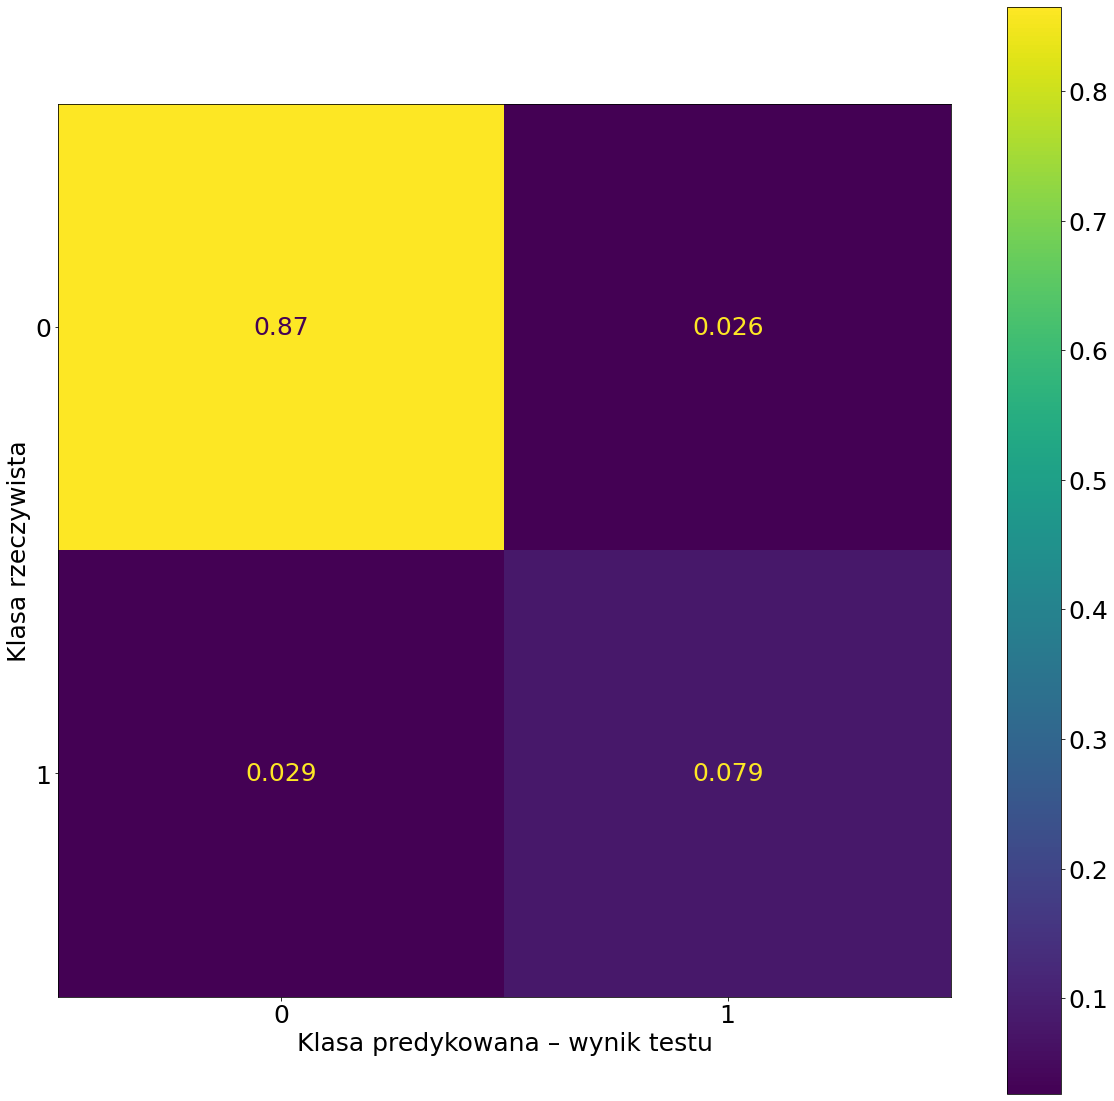

In [365]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(target_test, y_pred, normalize='all')
plt.rcParams.update({'font.size': 25})
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.xlabel('Klasa predykowana – wynik testu')
plt.ylabel('Klasa rzeczywista')
plt.show()

In [366]:
end = time.time()
time1 =end-start
time1

15.161338567733765

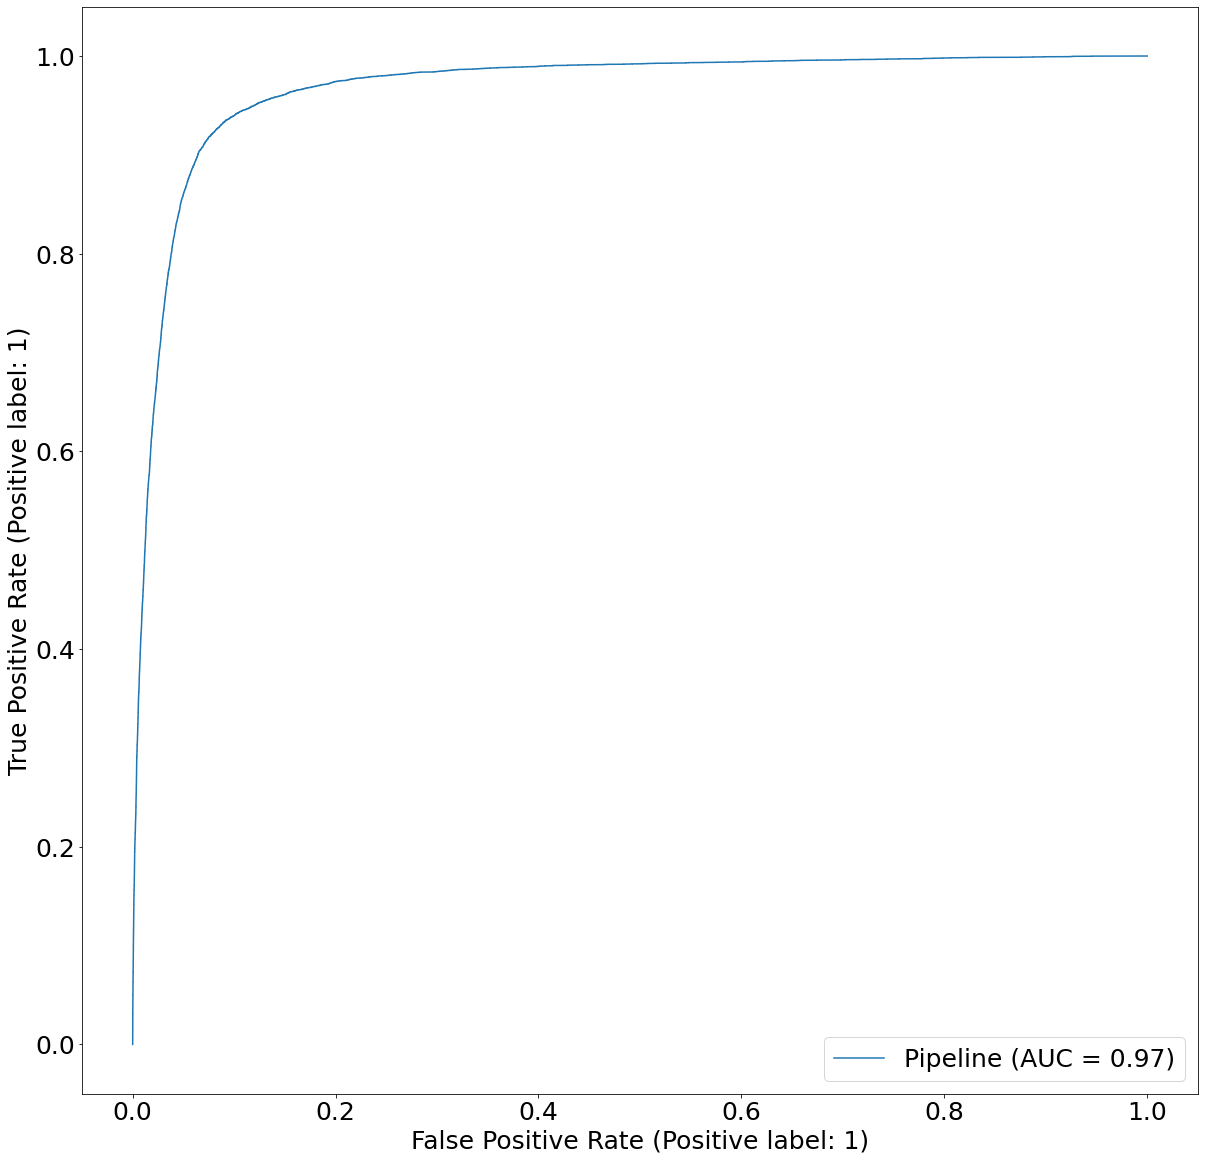

In [367]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, data_test, target_test)
plt.show()

# Random forest

In [368]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model2 = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=300, criterion='gini', bootstrap=True, n_jobs=-1))

In [369]:
from sklearn import set_config
set_config(display='diagram')
model2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PORA_DNIA',
                                                   'ILOŚĆ_MIESZKAŃCÓW_OBIEKTU',
                                                   'CZY_CZUJNIK_DYMU_JEST_W_OBIEKCIE',
                                                   'RODZAJ_CZUJNIKA_DYMU_W_MIESZKANIU',
                                                   'POWÓD_ZŁEGO_ZADZIAŁANIA_ALRMU',
                                                   'CZAS_DO_ZAUWAŻENIA_POŻARU',
                                                   'CZAS_MIĘDZY_ODKRYCIEM_A_ZGŁOSZENIEM',
                                                   'CO_NAPĘDZA_Z...
                                                   'PÓŹNE_WYWOŁANIE',
                                                   'CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM',
                                                   'KOD_POJAZDÓW',
                                                   'KOD_PERSONELU',
                                                   'KOD_CZAS_INCYDENTU',
                                                   'POSZKODOWANI_MARTWI',
                                                   'URATOWANI',
                                                   'KOD_EWAKUOWANI',
                                                   'KOD_OBSZAR_USZKODZONY_PRZEZ_POŻAR',
                                                   'KOD_OBSZAR USZKODZONY '
                                                   'PRZEZ POŻAR_ORAZ_WODĘ',
                                                   'SĄSIEDNI_OBIEKT_USZKODZONY'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=300, n_jobs=-1))])

In [370]:
start = time.time()

In [371]:
_ = model2.fit(data_train, target_train)

In [372]:
y_pred2=model2.predict(data_test)
model2.predict(data_test)[:200]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [373]:
target_test[:10]

185609    0
56081     0
142215    0
302354    0
143385    1
245157    0
236696    0
341575    0
16193     0
257609    0
Name: PRZYPADKOWE_CZY_CELOWE, dtype: int64

In [374]:
model2.score(data_test, target_test)

0.9488106653111679

In [375]:
print("Accuracy:",accuracy_score(target_test, y_pred2)) 
print("Precision:",precision_score(target_test, y_pred2)) 
print("Recall:",recall_score(target_test, y_pred2))
print("F1:",f1_score(target_test, y_pred2))

Accuracy: 0.9488106653111679
Precision: 0.7771211952280076
Recall: 0.7413316315677515
F1: 0.7588046377442709


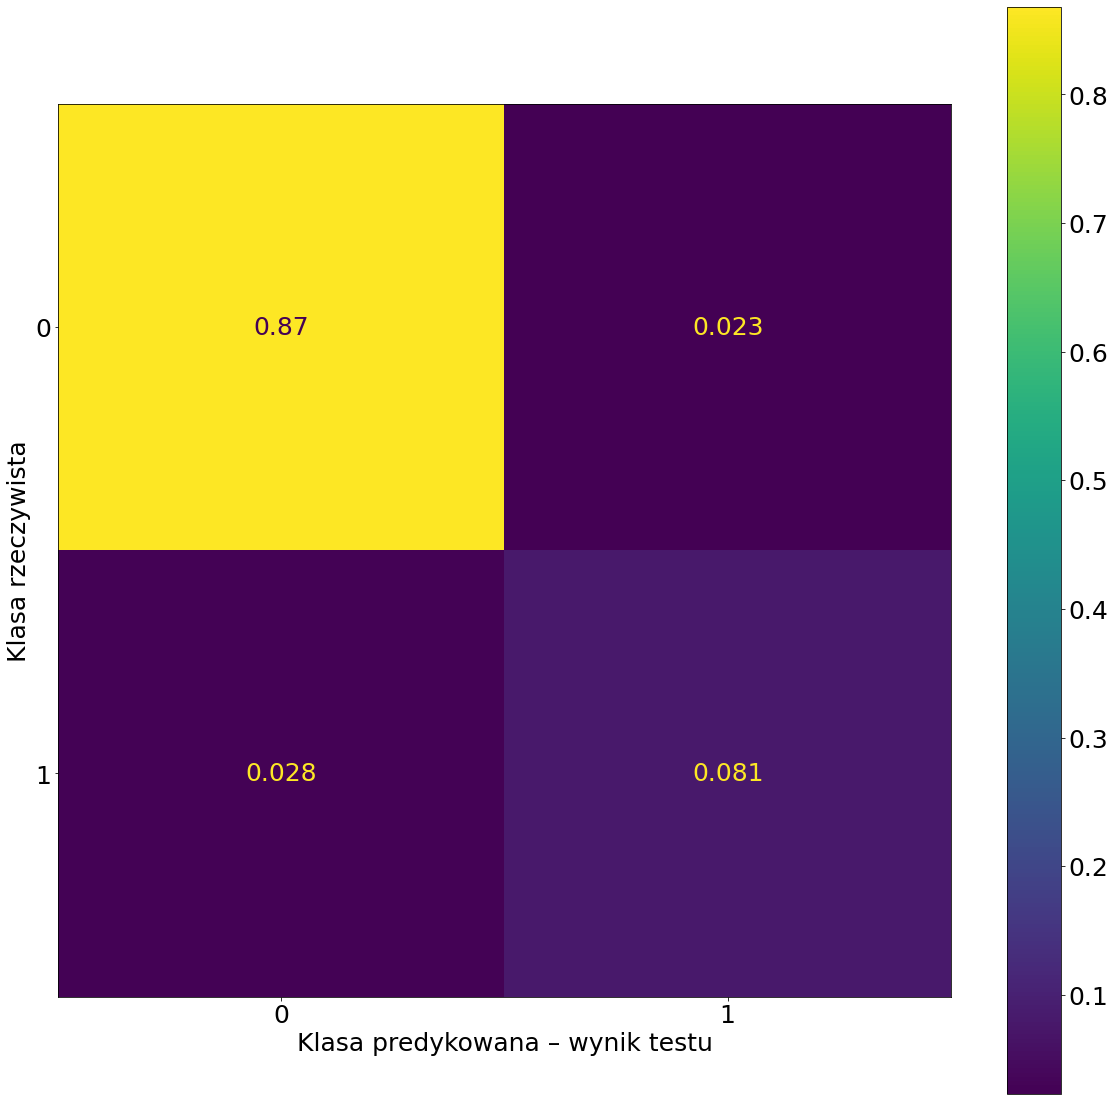

In [376]:

cm2 = confusion_matrix(target_test, y_pred2, normalize='all')

cm2_display = ConfusionMatrixDisplay(cm2).plot()
plt.xlabel('Klasa predykowana – wynik testu')
plt.ylabel('Klasa rzeczywista')
plt.show()

In [377]:
end = time.time()
time2 =end-start
time2

382.87764382362366

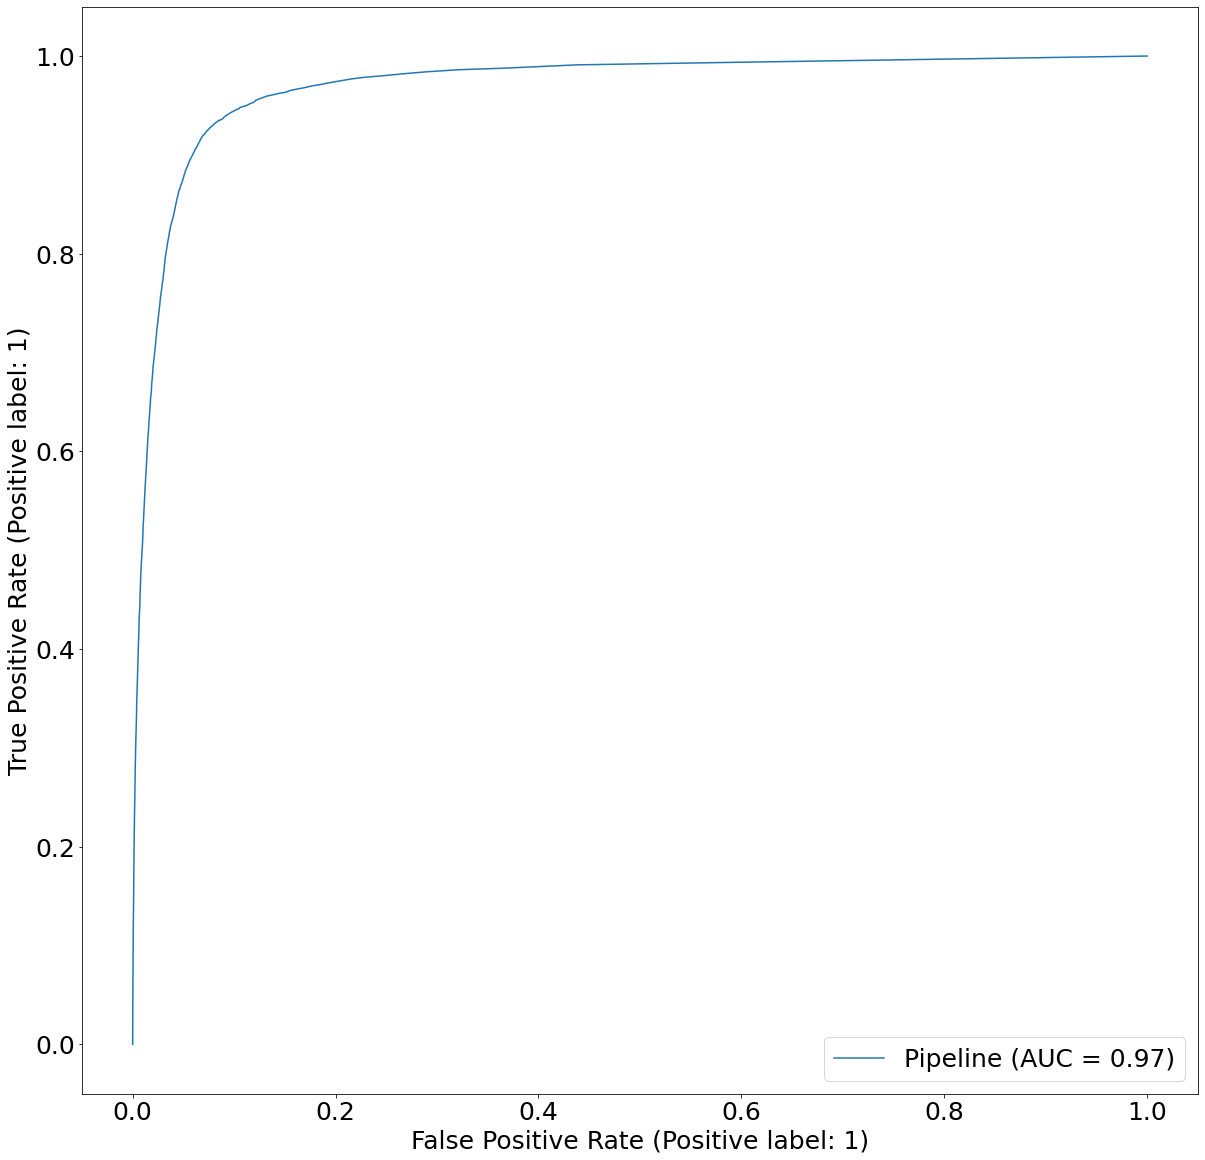

In [378]:
RocCurveDisplay.from_estimator(model2, data_test, target_test)
plt.show()

# Decision tree

In [379]:
from sklearn.tree import DecisionTreeClassifier

In [380]:
model3 = make_pipeline(preprocessor, DecisionTreeClassifier(criterion='entropy', min_samples_split=16, splitter='random'))

In [381]:
from sklearn import set_config
set_config(display='diagram')
model3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PORA_DNIA',
                                                   'ILOŚĆ_MIESZKAŃCÓW_OBIEKTU',
                                                   'CZY_CZUJNIK_DYMU_JEST_W_OBIEKCIE',
                                                   'RODZAJ_CZUJNIKA_DYMU_W_MIESZKANIU',
                                                   'POWÓD_ZŁEGO_ZADZIAŁANIA_ALRMU',
                                                   'CZAS_DO_ZAUWAŻENIA_POŻARU',
                                                   'CZAS_MIĘDZY_ODKRYCIEM_A_ZGŁOSZENIEM',
                                                   'CO_NAPĘDZA_Z...
                                                   'CZY_SĄSIEDNI_OBIEKT_ZOSTAŁ_DOTKNIĘTY_POŻAREM',
                                                   'KOD_POJAZDÓW',
                                                   'KOD_PERSONELU',
                                                   'KOD_CZAS_INCYDENTU',
                                                   'POSZKODOWANI_MARTWI',
                                                   'URATOWANI',
                                                   'KOD_EWAKUOWANI',
                                                   'KOD_OBSZAR_USZKODZONY_PRZEZ_POŻAR',
                                                   'KOD_OBSZAR USZKODZONY '
                                                   'PRZEZ POŻAR_ORAZ_WODĘ',
                                                   'SĄSIEDNI_OBIEKT_USZKODZONY'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy',
                                        min_samples_split=16,
                                        splitter='random'))])

In [382]:
start = time.time()

In [383]:
model3 = model3.fit(data_train, target_train)

In [384]:
y_pred3=model3.predict(data_test)
model3.predict(data_test)[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [385]:
target_test[:10]

185609    0
56081     0
142215    0
302354    0
143385    1
245157    0
236696    0
341575    0
16193     0
257609    0
Name: PRZYPADKOWE_CZY_CELOWE, dtype: int64

In [386]:
model3.score(data_test, target_test)

0.9317706588417417

In [387]:
print("Accuracy:",accuracy_score(target_test, y_pred3))
print("Precision:",precision_score(target_test, y_pred3))
print("Recall:",recall_score(target_test, y_pred3))
print("F1:",f1_score(target_test, y_pred3))

Accuracy: 0.9317706588417417
Precision: 0.6964044943820225
Recall: 0.6592214422463306
F1: 0.6773030269915857


In [388]:
model3.get_params(deep=True)

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('one-hot-encoder',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    ['PORA_DNIA', 'ILOŚĆ_MIESZKAŃCÓW_OBIEKTU',
                                     'CZY_CZUJNIK_DYMU_JEST_W_OBIEKCIE',
                                     'RODZAJ_CZUJNIKA_DYMU_W_MIESZKANIU',
                                     'POWÓD_ZŁEGO_ZADZIAŁANIA_ALRMU',
                                     'CZAS_DO_ZAUWAŻENIA_POŻARU',
                                     'CZAS_MIĘDZY_ODKRYCIEM_A_ZGŁOSZENIEM',
                                     'CO_NAPĘDZA_ZAPŁON', 'ŹRÓDŁO_POŻARU',
                                     'LOKACJA_ROZPO...
                                     'SPECJALNA_BUDOWA_OBIEKTU',
                                     'CZY_BUDYNEK_JEST_NORMALNIE_ZAJĘTY',
                                     'LICZBA_CZUJNIKÓW_DYMU', 'PÓŹNE_WYWOŁANIE',
                               

In [389]:
end = time.time()
time3 =end-start
time3

31.461076974868774

In [390]:
from sklearn.tree import plot_tree
from sklearn import tree

In [391]:
m=model3[:-1].get_feature_names_out()

In [392]:
m = [words.replace('one-hot-encoder__','') for words in m];
m = [words.replace('standard_scaler__','') for words in m];

[Text(0.5455043859649122, 0.9285714285714286, 'node #0\nCO_NAPĘDZA_ZAPŁON_Inne <= 0.914\nentropy = 0.495\nsamples = 259682\nvalue = [231560, 28122]'),
 Text(0.2807017543859649, 0.7857142857142857, 'node #1\nPRZEDMIOT_KTÓRY_ZAPŁONĄŁ_Papier <= 0.625\nentropy = 0.051\nsamples = 179414\nvalue = [178391, 1023]'),
 Text(0.14035087719298245, 0.6428571428571429, 'node #2\nPRZEDMIOT_KTÓRY_ZAPŁONĄŁ_Ubrania <= 0.381\nentropy = 0.043\nsamples = 174736\nvalue = [173912, 824]'),
 Text(0.07017543859649122, 0.5, 'node #3\nPRZEDMIOT_KTÓRY_ZAPŁONĄŁ_Śmieci <= 0.729\nentropy = 0.036\nsamples = 161136\nvalue = [160534, 602]'),
 Text(0.03508771929824561, 0.35714285714285715, 'node #4\nILOŚĆ_MIESZKAŃCÓW_OBIEKTU_Samotna osoba poniżej wieku emerytalnego <= 0.585\nentropy = 0.034\nsamples = 160108\nvalue = [159542, 566]'),
 Text(0.017543859649122806, 0.21428571428571427, 'node #5\nILOŚĆ_MIESZKAŃCÓW_OBIEKTU_Inne <= 0.514\nentropy = 0.029\nsamples = 131201\nvalue = [130820, 381]'),
 Text(0.008771929824561403, 0.0

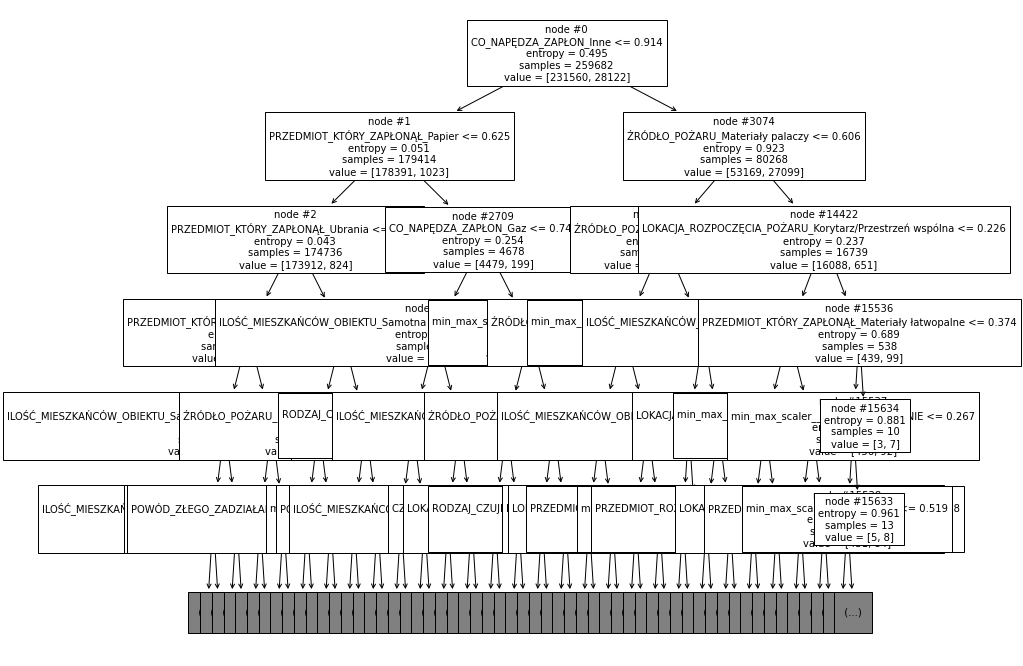

In [393]:
plt.figure(figsize=(12,12))
plot_tree(model3.named_steps['decisiontreeclassifier'], fontsize=10, node_ids=True, feature_names=m, max_depth=5)

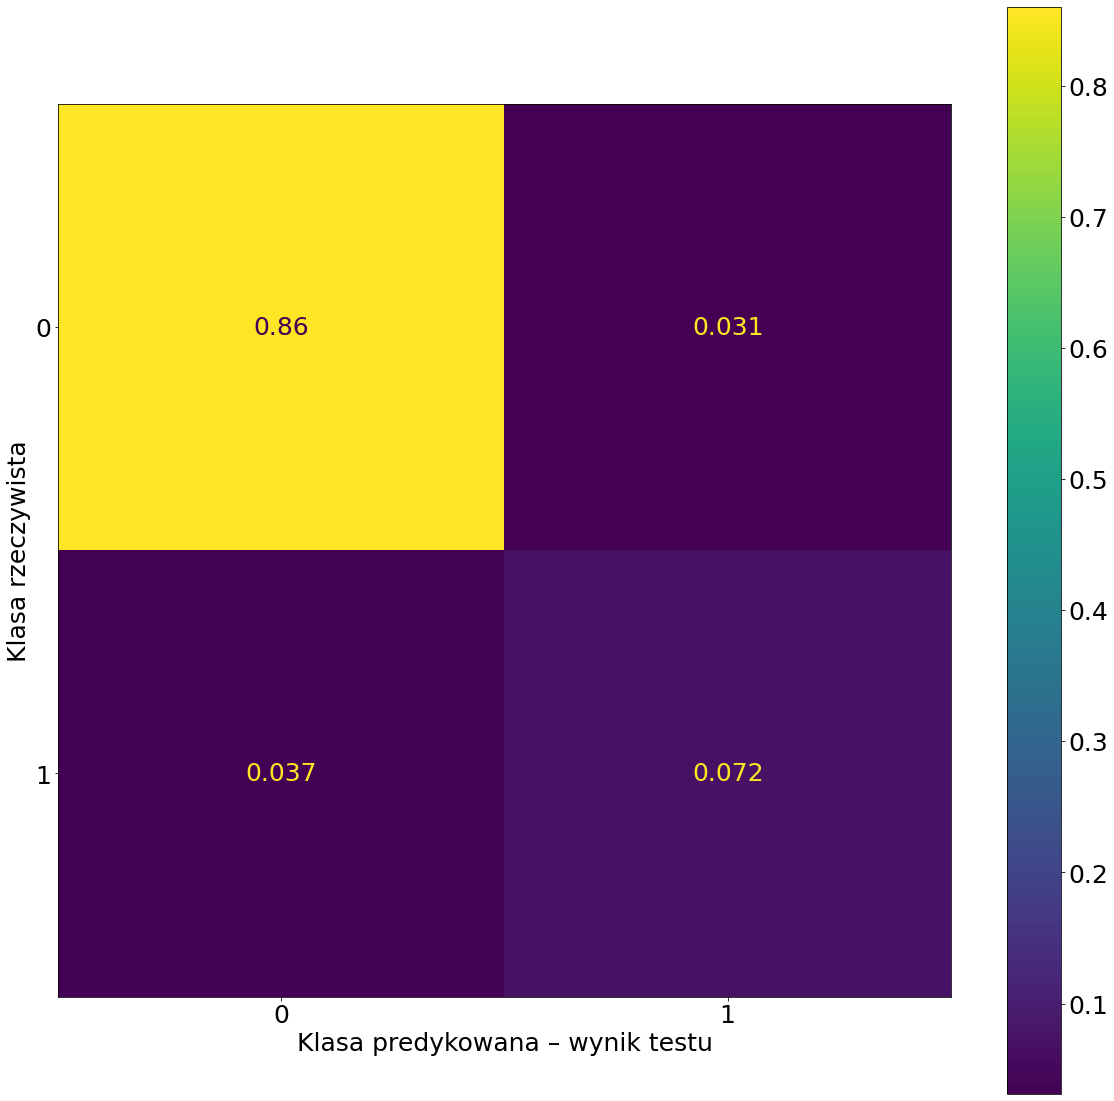

In [394]:
cm3 = confusion_matrix(target_test, y_pred3, normalize='all')

cm3_display = ConfusionMatrixDisplay(cm3).plot()
plt.xlabel('Klasa predykowana – wynik testu')
plt.ylabel('Klasa rzeczywista')
plt.show()

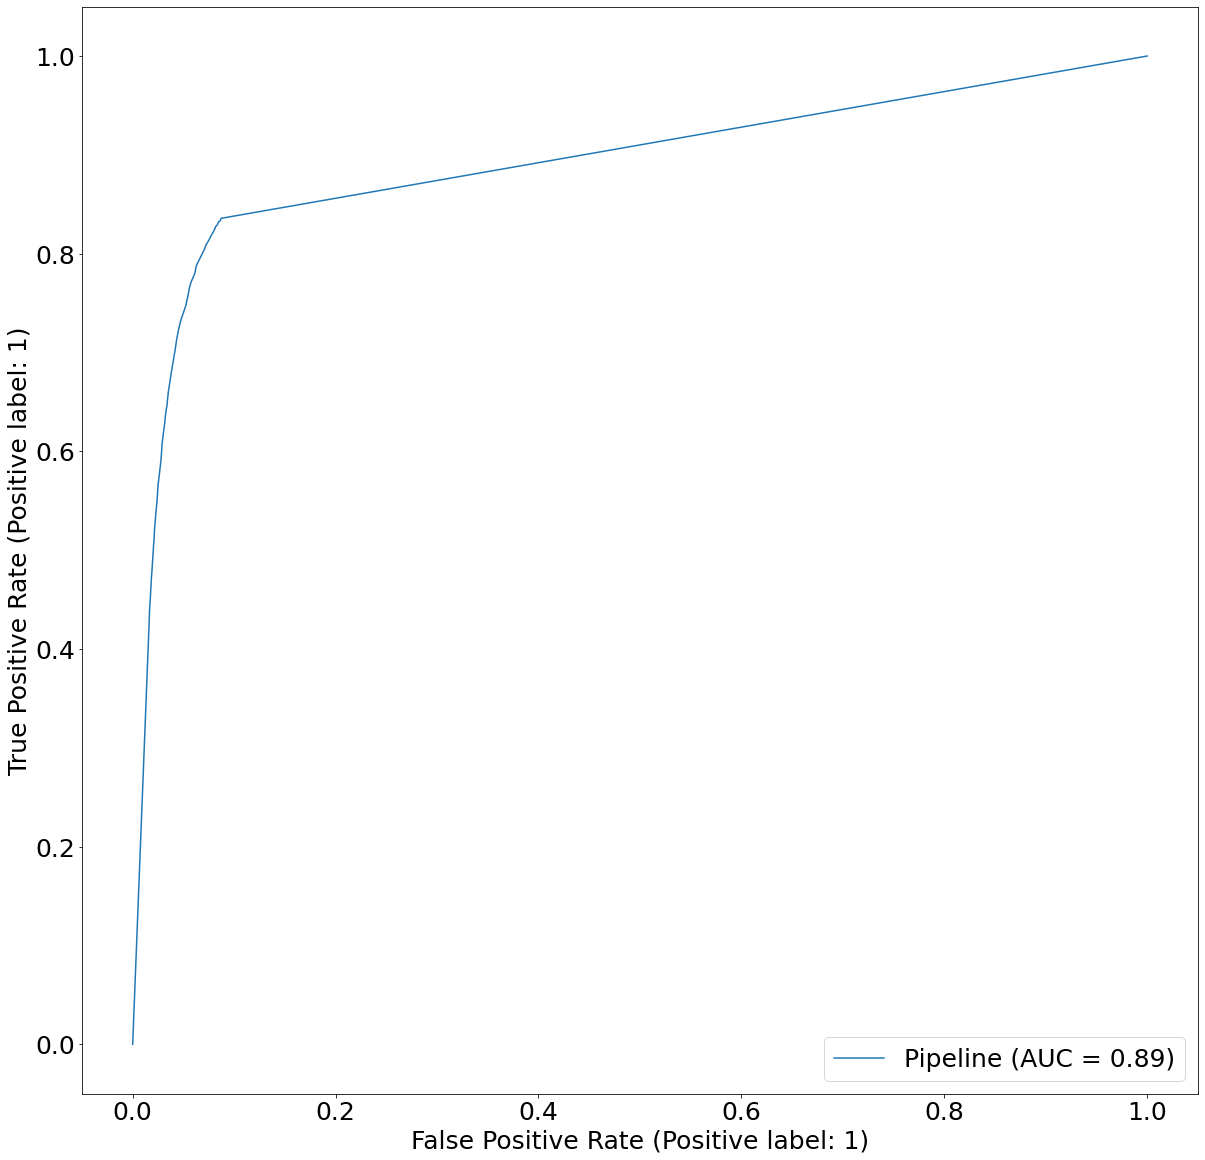

In [395]:
RocCurveDisplay.from_estimator(model3, data_test, target_test)
plt.show()

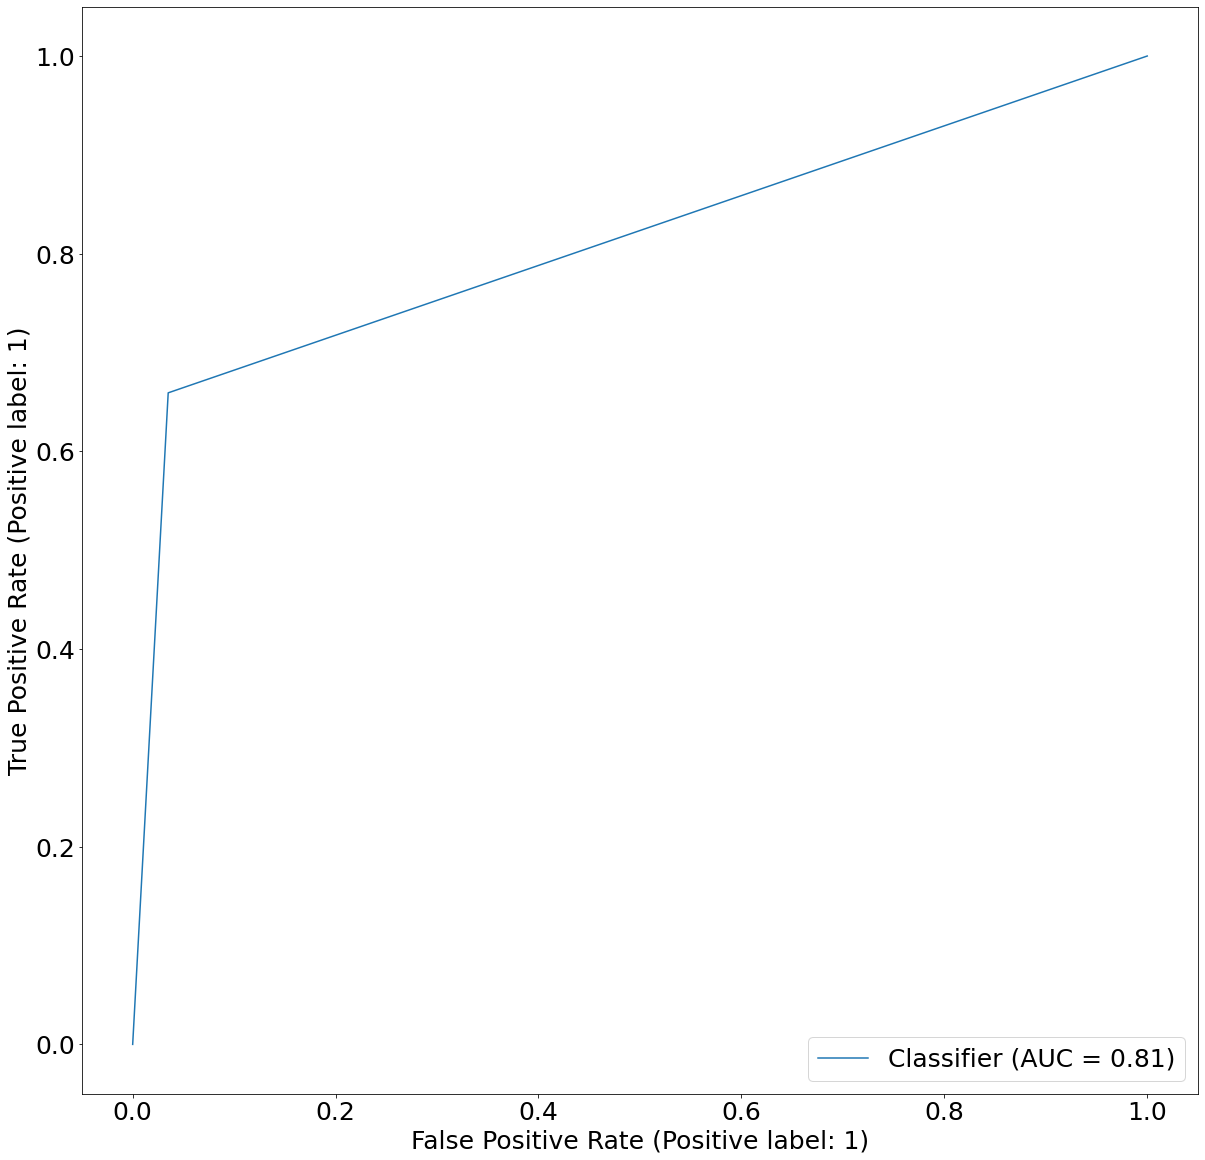

In [396]:
RocCurveDisplay.from_predictions(target_test, y_pred3)
plt.show()

# K NAJBLIŻSZYCH SĄSIADÓW

In [397]:
from sklearn.neighbors import KNeighborsClassifier

In [398]:
model4 = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=7, n_jobs=-1))

In [399]:
start = time.time()

In [400]:
model4 = model4.fit(data_train, target_train)

In [401]:
y_pred4=model4.predict(data_test)
model4.predict(data_test)[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [402]:
target_test[:10]

185609    0
56081     0
142215    0
302354    0
143385    1
245157    0
236696    0
341575    0
16193     0
257609    0
Name: PRZYPADKOWE_CZY_CELOWE, dtype: int64

In [403]:
model4.score(data_test, target_test)

0.9328797033305992

In [404]:
print("Accuracy:",accuracy_score(target_test, y_pred4))
print("Precision:",precision_score(target_test, y_pred4))
print("Recall:",recall_score(target_test, y_pred4))
print("F1:",f1_score(target_test, y_pred4))

Accuracy: 0.9328797033305992
Precision: 0.7127962085308057
Recall: 0.6398638587534567
F1: 0.6743638605537496


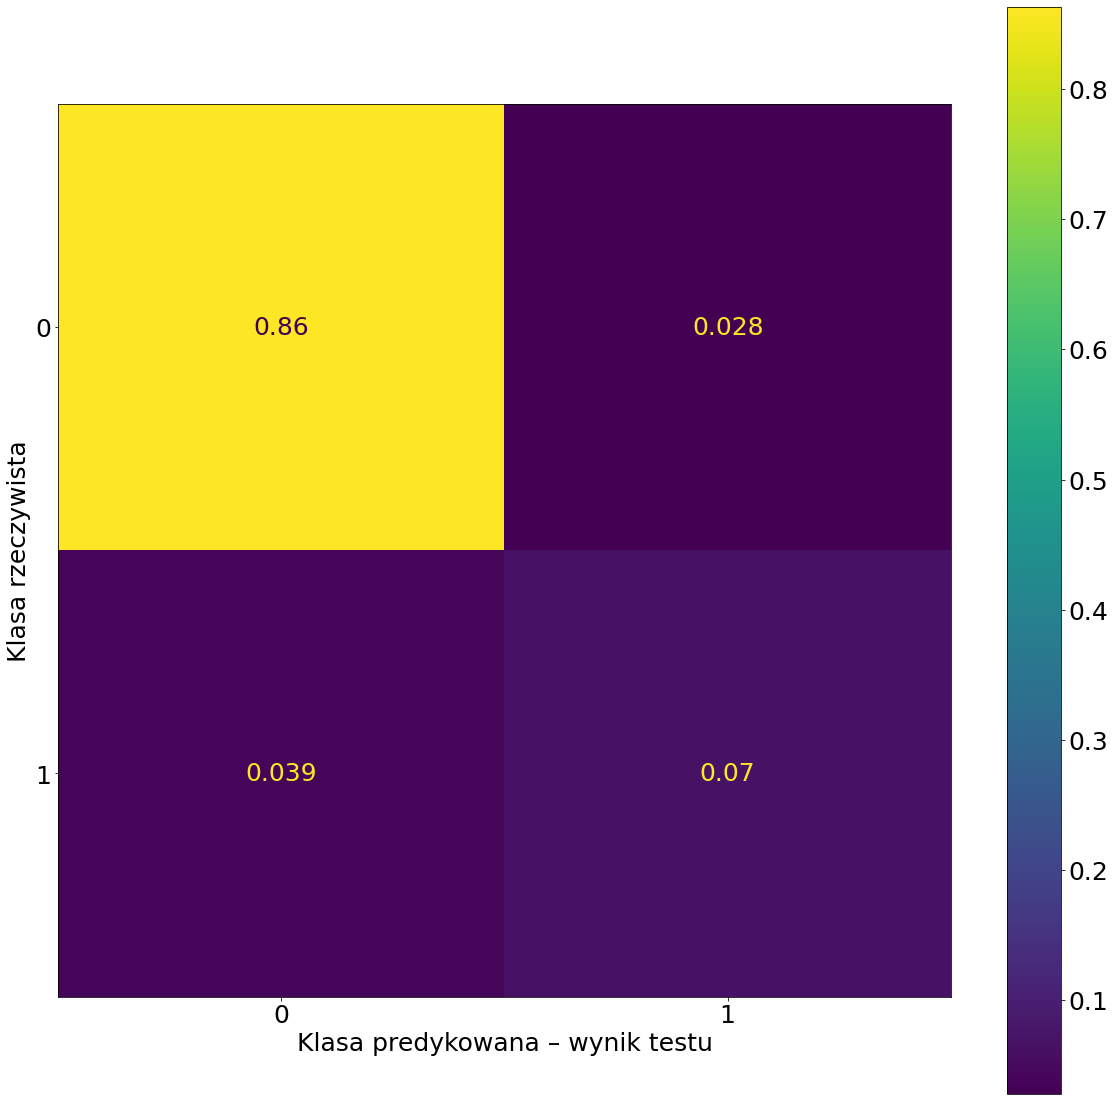

In [405]:
cm4 = confusion_matrix(target_test, y_pred4, normalize='all')

cm4_display = ConfusionMatrixDisplay(cm4).plot()
plt.xlabel('Klasa predykowana – wynik testu')
plt.ylabel('Klasa rzeczywista')
plt.show()

In [406]:
end = time.time()
time4 =end-start
time4

2547.1933727264404

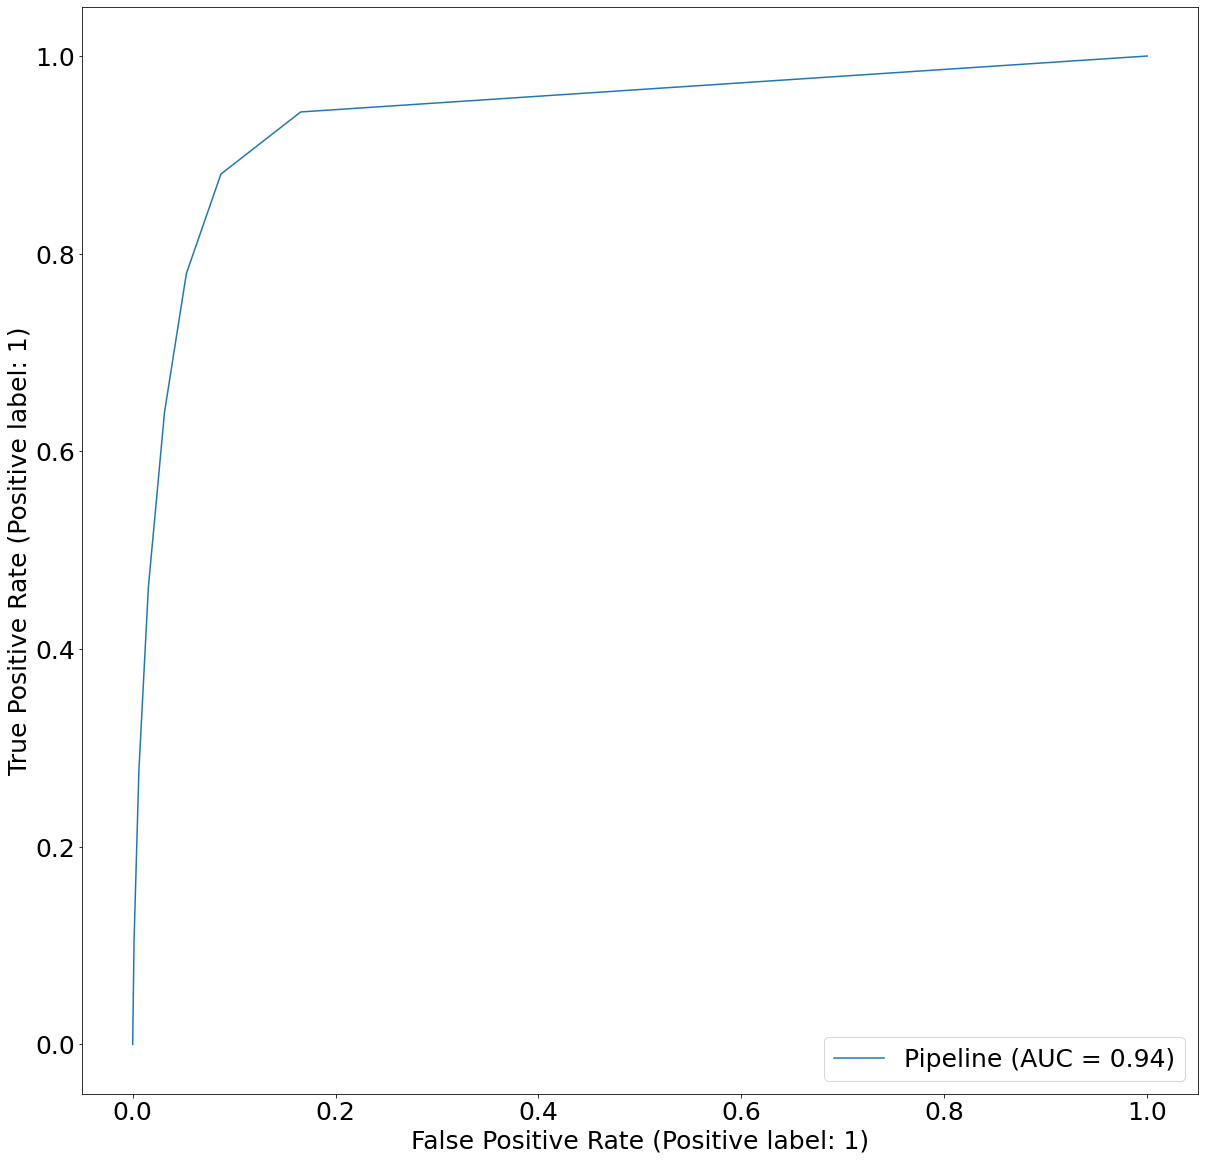

In [407]:
RocCurveDisplay.from_estimator(model4, data_test, target_test)
plt.show()

# SVC

In [408]:
from sklearn.svm import SVC

In [409]:
model5 = make_pipeline(preprocessor, SVC(kernel='rbf', gamma='auto'))

In [410]:
start = time.time()

In [411]:
model5 = model5.fit(data_train, target_train)

In [412]:
y_pred5=model5.predict(data_test)
model5.predict(data_test)[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [413]:
target_test[:10]

185609    0
56081     0
142215    0
302354    0
143385    1
245157    0
236696    0
341575    0
16193     0
257609    0
Name: PRZYPADKOWE_CZY_CELOWE, dtype: int64

In [414]:
model5.score(data_test, target_test)

0.9462113422904079

In [415]:
print("Accuracy:",accuracy_score(target_test, y_pred5))
print("Precision:",precision_score(target_test, y_pred5))
print("Recall:",recall_score(target_test, y_pred5))
print("F1:",f1_score(target_test, y_pred5))

Accuracy: 0.9462113422904079
Precision: 0.7496843434343434
Recall: 0.7578174856413529
F1: 0.753728974928594


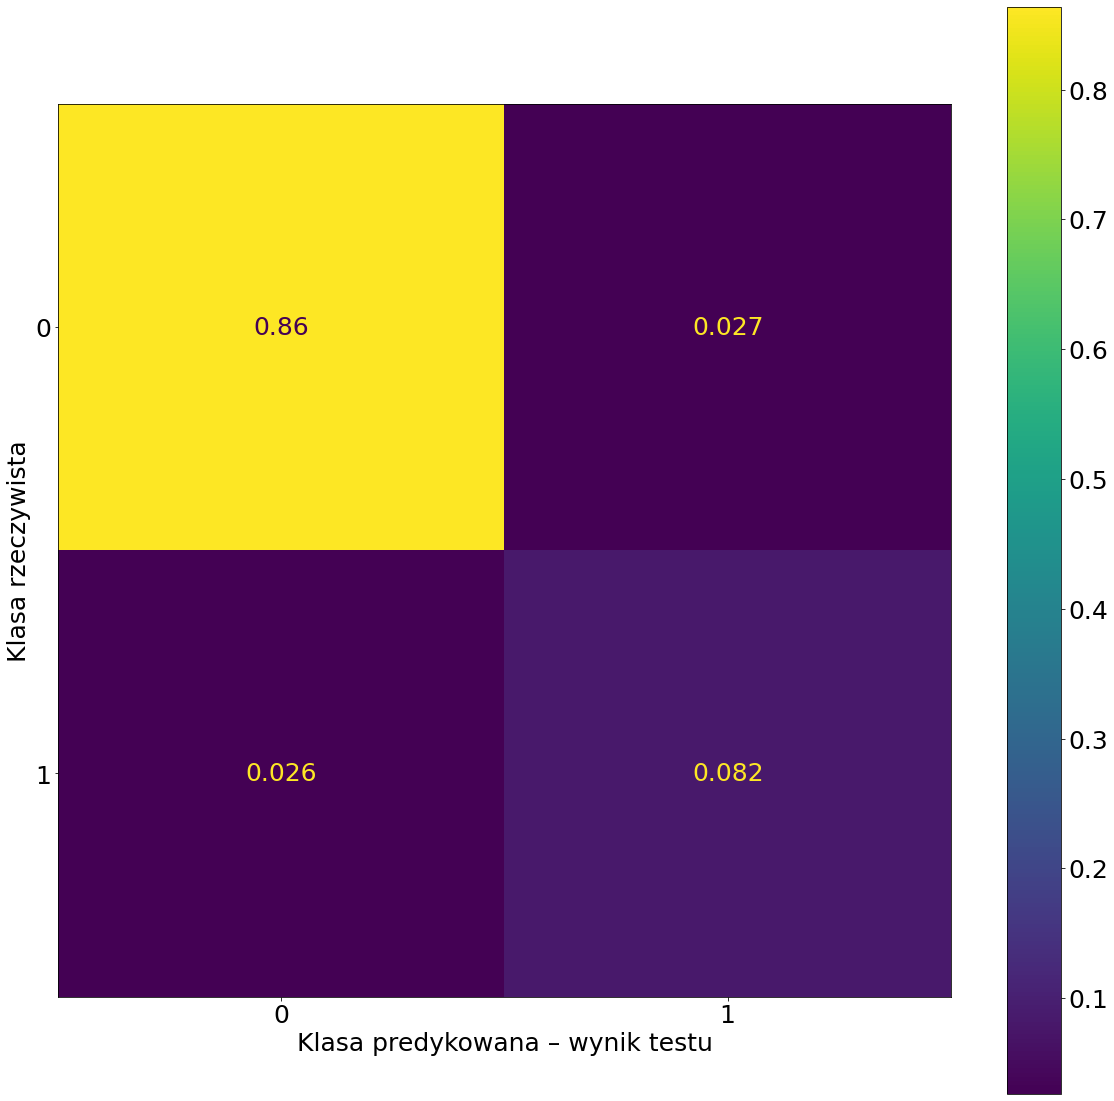

In [416]:
cm5 = confusion_matrix(target_test, y_pred5, normalize='all')

cm5_display = ConfusionMatrixDisplay(cm5).plot()
plt.xlabel('Klasa predykowana – wynik testu')
plt.ylabel('Klasa rzeczywista')
plt.show()

In [417]:
end = time.time()
time5 =end-start
time5

2881.850364923477

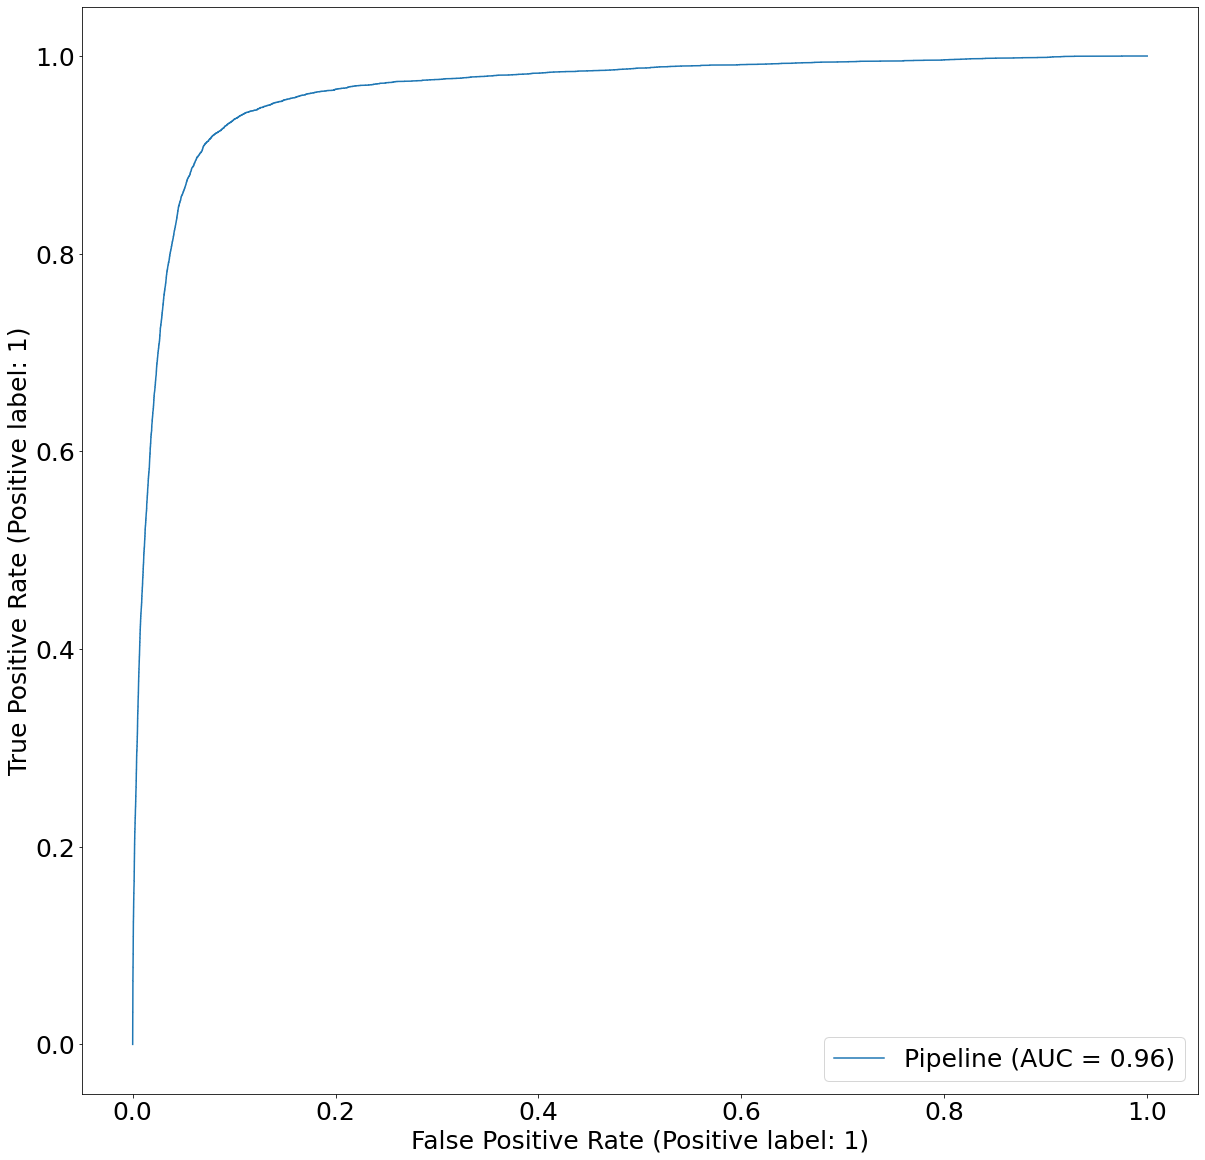

In [418]:
RocCurveDisplay.from_estimator(model5, data_test, target_test)
plt.show()

# EXTRA TREE CLASSIFIER

In [419]:
from sklearn.tree import ExtraTreeClassifier

In [420]:
model6 = make_pipeline(preprocessor, ExtraTreeClassifier(criterion='gini', max_features='sqrt', min_samples_leaf=2, splitter='random'))

In [421]:
start = time.time()

In [422]:
model6 = model6.fit(data_train, target_train)

In [423]:
y_pred6=model6.predict(data_test)
model6.predict(data_test)[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [424]:
target_test[:10]

185609    0
56081     0
142215    0
302354    0
143385    1
245157    0
236696    0
341575    0
16193     0
257609    0
Name: PRZYPADKOWE_CZY_CELOWE, dtype: int64

In [425]:
model6.score(data_test, target_test)

0.926364066958561

In [426]:
print("Accuracy:",accuracy_score(target_test, y_pred6))
print("Precision:",precision_score(target_test, y_pred6))
print("Recall:",recall_score(target_test, y_pred6))
print("F1:",f1_score(target_test, y_pred6))

Accuracy: 0.926364066958561
Precision: 0.6922295581513459
Recall: 0.5798766219953202
F1: 0.6310915615233246


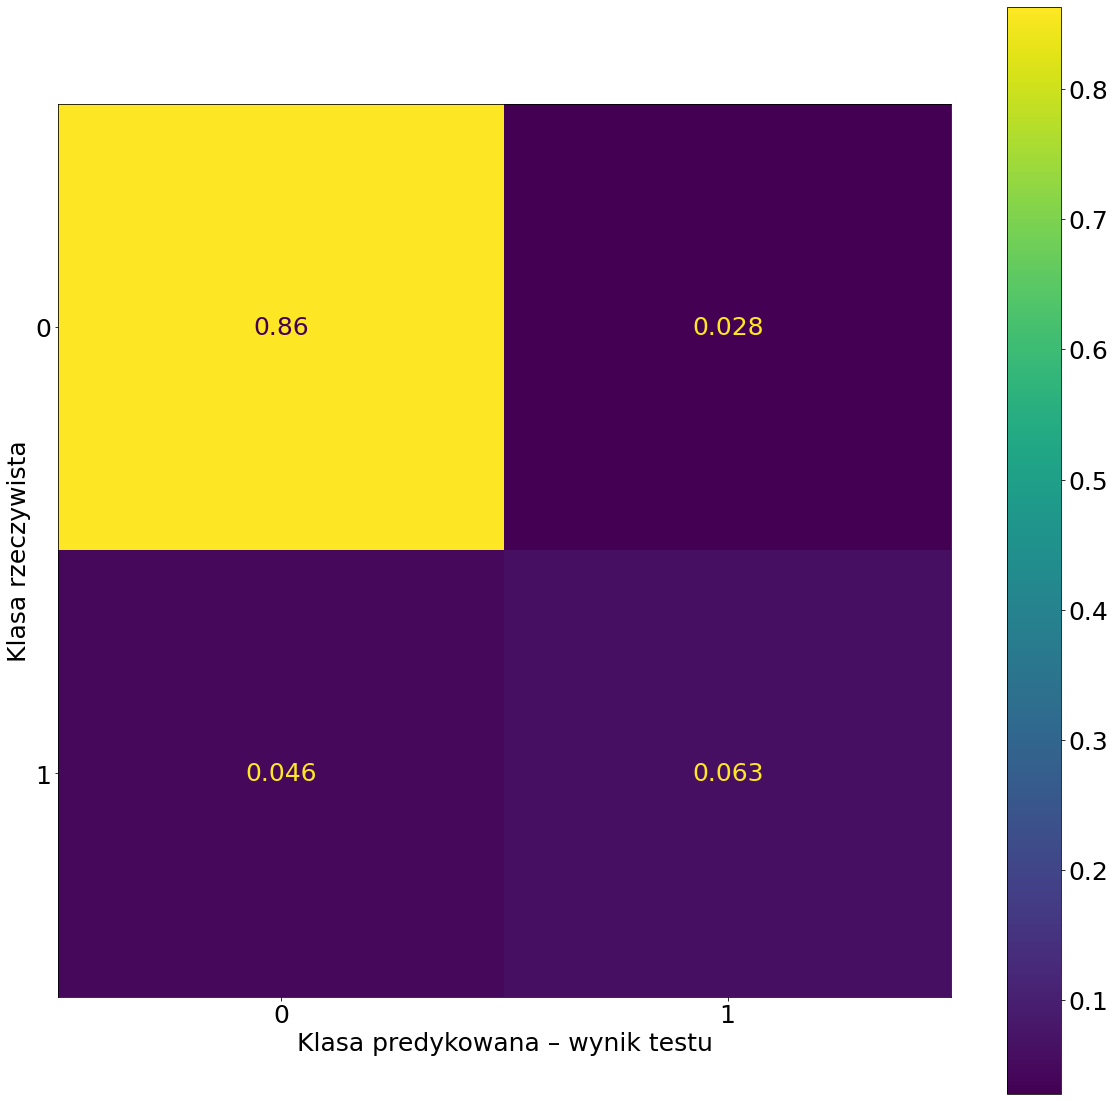

In [427]:
cm6 = confusion_matrix(target_test, y_pred6, normalize='all')

cm6_display = ConfusionMatrixDisplay(cm6).plot()
plt.xlabel('Klasa predykowana – wynik testu')
plt.ylabel('Klasa rzeczywista')
plt.show()

In [428]:
end = time.time()
time6 =end-start
time6

7.371035814285278

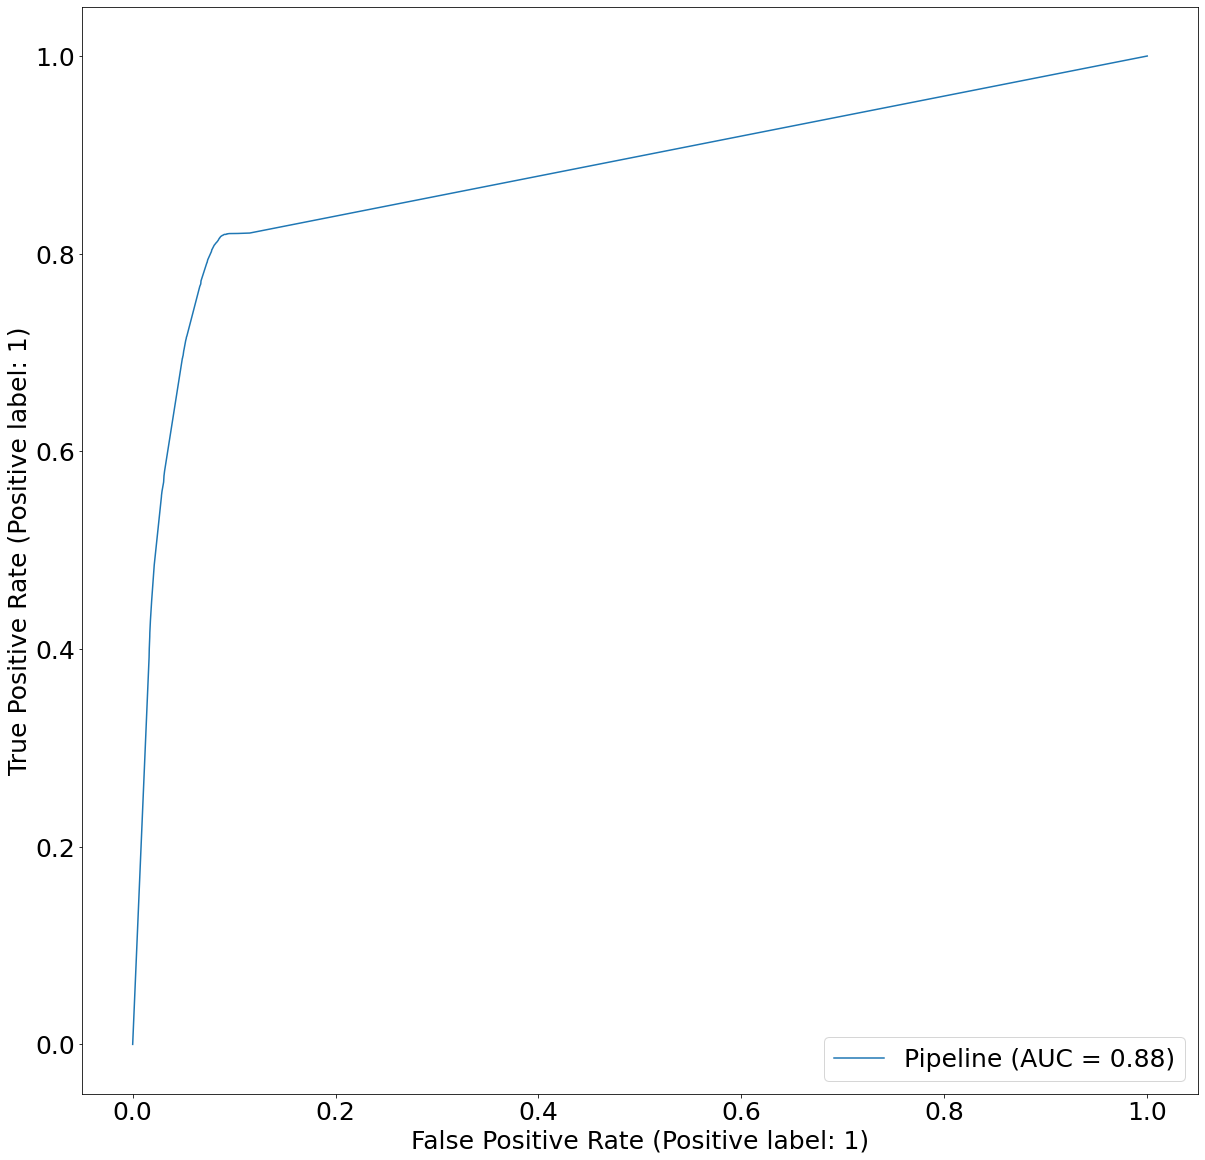

In [429]:
RocCurveDisplay.from_estimator(model6, data_test, target_test)
plt.show()

# DUMMY CLASSIFIER

In [430]:
from sklearn.dummy import DummyClassifier

In [431]:
model7 = make_pipeline(preprocessor, DummyClassifier(strategy="most_frequent"))

In [432]:
start = time.time()

In [433]:
model7 = model7.fit(data_train, target_train)

In [434]:
y_pred7=model7.predict(data_test)
model7.predict(data_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [435]:
target_test[:10]

185609    0
56081     0
142215    0
302354    0
143385    1
245157    0
236696    0
341575    0
16193     0
257609    0
Name: PRZYPADKOWE_CZY_CELOWE, dtype: int64

In [436]:
model7.score(data_test, target_test)

0.8913829553725119

In [437]:
print("Accuracy:",accuracy_score(target_test, y_pred7))
print("Precision:",precision_score(target_test, y_pred7))
print("Recall:",recall_score(target_test, y_pred7))
print("F1:",f1_score(target_test, y_pred7))

Accuracy: 0.8913829553725119
Precision: 0.0
Recall: 0.0
F1: 0.0


C:\Users\pawel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


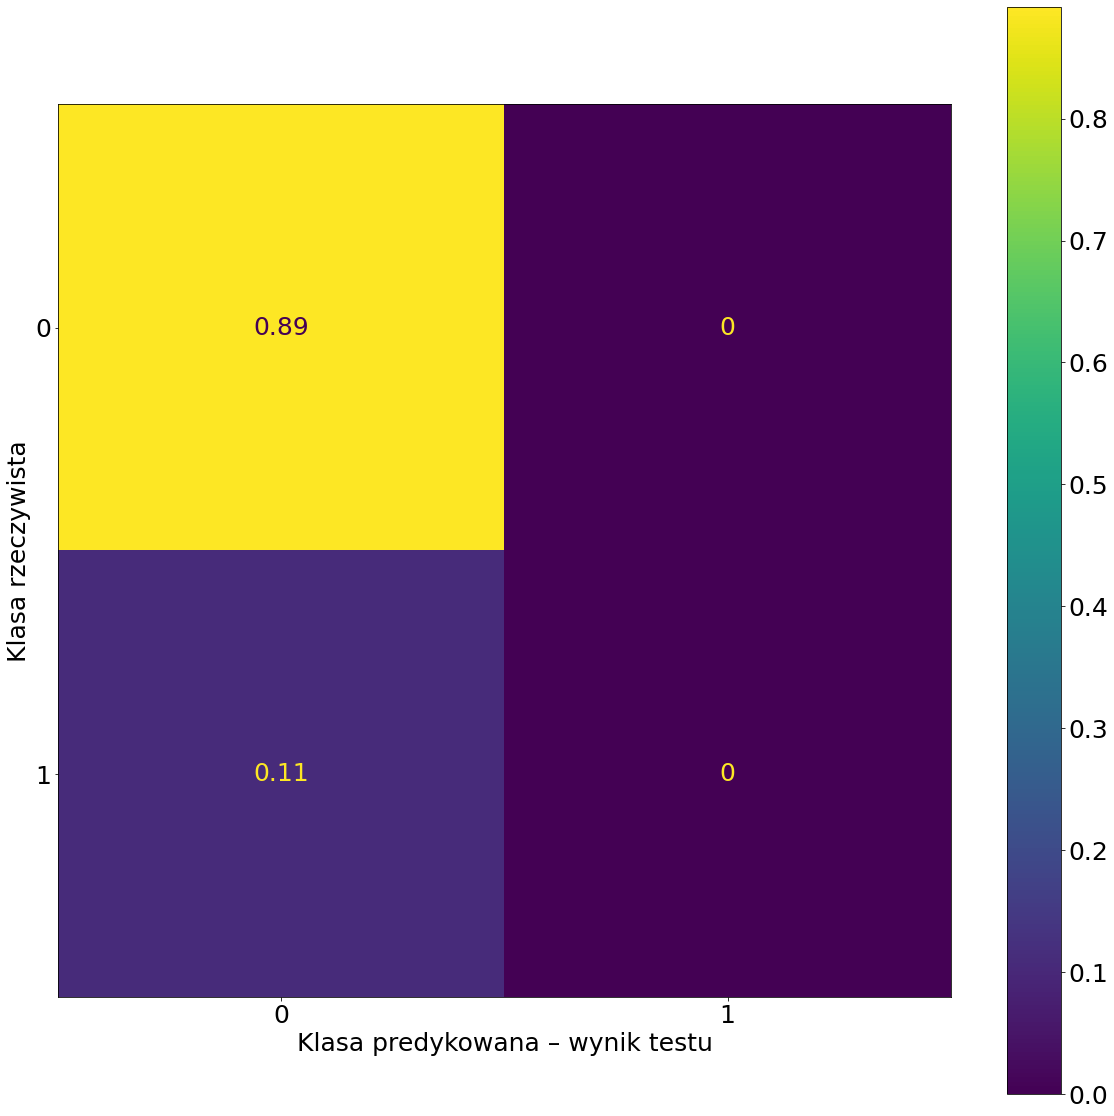

In [438]:
cm7 = confusion_matrix(target_test, y_pred7, normalize='all')

cm7_display = ConfusionMatrixDisplay(cm7).plot()
plt.xlabel('Klasa predykowana – wynik testu')
plt.ylabel('Klasa rzeczywista')
plt.show()

In [439]:
end = time.time()
time7 =end-start
time7

2.168485403060913

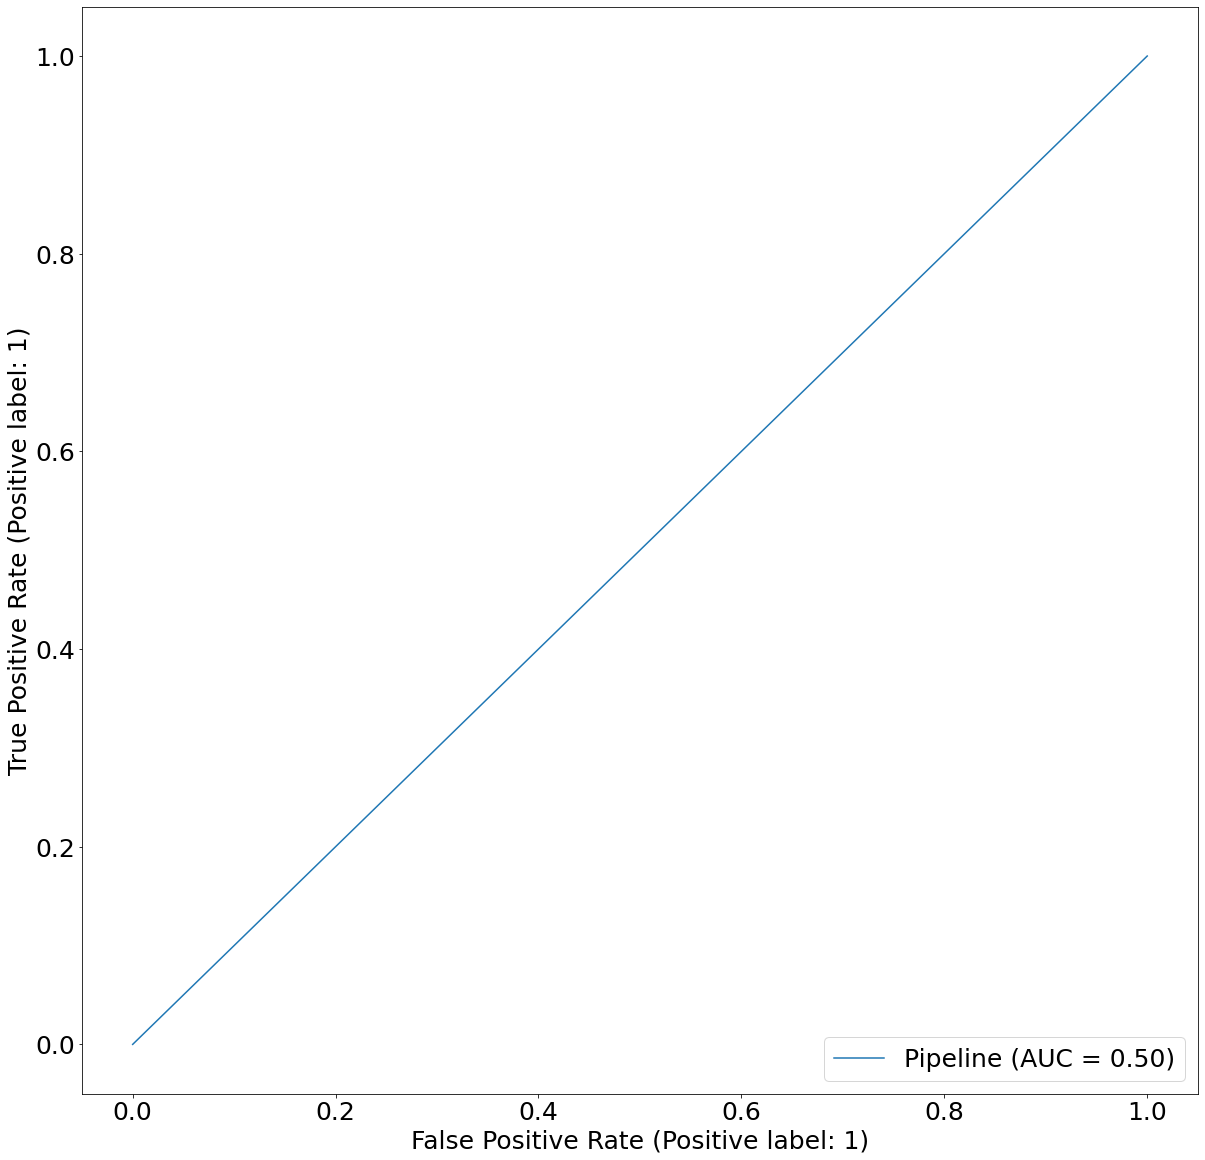

In [440]:
RocCurveDisplay.from_estimator(model7, data_test, target_test)
plt.show()

# CAT BOOST

In [441]:
from catboost import CatBoostClassifier

In [442]:
model8 = make_pipeline(preprocessor, CatBoostClassifier(iterations=1000, depth=8))

In [443]:
start = time.time()

In [444]:
model8 = model8.fit(data_train, target_train)

Learning rate set to 0.110637
0:	learn: 0.5049239	total: 45.5ms	remaining: 45.5s
1:	learn: 0.3835384	total: 75.6ms	remaining: 37.7s
2:	learn: 0.3035764	total: 106ms	remaining: 35.3s
3:	learn: 0.2519022	total: 136ms	remaining: 33.7s
4:	learn: 0.2192970	total: 164ms	remaining: 32.6s
5:	learn: 0.1977522	total: 194ms	remaining: 32.2s
6:	learn: 0.1832392	total: 222ms	remaining: 31.4s
7:	learn: 0.1732127	total: 249ms	remaining: 30.9s
8:	learn: 0.1678680	total: 277ms	remaining: 30.5s
9:	learn: 0.1616980	total: 303ms	remaining: 30s
10:	learn: 0.1581582	total: 330ms	remaining: 29.6s
11:	learn: 0.1556833	total: 356ms	remaining: 29.3s
12:	learn: 0.1530985	total: 384ms	remaining: 29.2s
13:	learn: 0.1505891	total: 418ms	remaining: 29.5s
14:	learn: 0.1481141	total: 449ms	remaining: 29.5s
15:	learn: 0.1462585	total: 478ms	remaining: 29.4s
16:	learn: 0.1451513	total: 504ms	remaining: 29.1s
17:	learn: 0.1437122	total: 530ms	remaining: 28.9s
18:	learn: 0.1425480	total: 559ms	remaining: 28.9s
19:	learn: 

162:	learn: 0.1124848	total: 5.58s	remaining: 28.7s
163:	learn: 0.1123754	total: 5.61s	remaining: 28.6s
164:	learn: 0.1122793	total: 5.64s	remaining: 28.5s
165:	learn: 0.1121814	total: 5.67s	remaining: 28.5s
166:	learn: 0.1121031	total: 5.7s	remaining: 28.4s
167:	learn: 0.1120436	total: 5.73s	remaining: 28.4s
168:	learn: 0.1119712	total: 5.76s	remaining: 28.3s
169:	learn: 0.1118955	total: 5.79s	remaining: 28.3s
170:	learn: 0.1118054	total: 5.82s	remaining: 28.2s
171:	learn: 0.1117065	total: 5.85s	remaining: 28.2s
172:	learn: 0.1116021	total: 5.88s	remaining: 28.1s
173:	learn: 0.1114922	total: 5.91s	remaining: 28.1s
174:	learn: 0.1113848	total: 5.94s	remaining: 28s
175:	learn: 0.1113120	total: 5.97s	remaining: 28s
176:	learn: 0.1112311	total: 6.01s	remaining: 27.9s
177:	learn: 0.1111373	total: 6.04s	remaining: 27.9s
178:	learn: 0.1110324	total: 6.07s	remaining: 27.8s
179:	learn: 0.1109597	total: 6.09s	remaining: 27.8s
180:	learn: 0.1108722	total: 6.13s	remaining: 27.7s
181:	learn: 0.110

321:	learn: 0.1010280	total: 10.5s	remaining: 22.1s
322:	learn: 0.1009521	total: 10.5s	remaining: 22s
323:	learn: 0.1008808	total: 10.5s	remaining: 22s
324:	learn: 0.1008291	total: 10.6s	remaining: 22s
325:	learn: 0.1007769	total: 10.6s	remaining: 21.9s
326:	learn: 0.1007390	total: 10.6s	remaining: 21.9s
327:	learn: 0.1006826	total: 10.7s	remaining: 21.9s
328:	learn: 0.1006249	total: 10.7s	remaining: 21.8s
329:	learn: 0.1005696	total: 10.7s	remaining: 21.8s
330:	learn: 0.1004829	total: 10.8s	remaining: 21.8s
331:	learn: 0.1004486	total: 10.8s	remaining: 21.7s
332:	learn: 0.1003876	total: 10.8s	remaining: 21.7s
333:	learn: 0.1003436	total: 10.9s	remaining: 21.7s
334:	learn: 0.1002734	total: 10.9s	remaining: 21.6s
335:	learn: 0.1002164	total: 10.9s	remaining: 21.6s
336:	learn: 0.1001480	total: 11s	remaining: 21.6s
337:	learn: 0.1001100	total: 11s	remaining: 21.5s
338:	learn: 0.1000292	total: 11s	remaining: 21.5s
339:	learn: 0.0999602	total: 11.1s	remaining: 21.5s
340:	learn: 0.0999071	to

484:	learn: 0.0922435	total: 15.6s	remaining: 16.6s
485:	learn: 0.0921963	total: 15.6s	remaining: 16.5s
486:	learn: 0.0921539	total: 15.7s	remaining: 16.5s
487:	learn: 0.0920884	total: 15.7s	remaining: 16.5s
488:	learn: 0.0920322	total: 15.7s	remaining: 16.4s
489:	learn: 0.0919983	total: 15.8s	remaining: 16.4s
490:	learn: 0.0919328	total: 15.8s	remaining: 16.4s
491:	learn: 0.0918925	total: 15.8s	remaining: 16.3s
492:	learn: 0.0918440	total: 15.8s	remaining: 16.3s
493:	learn: 0.0917861	total: 15.9s	remaining: 16.3s
494:	learn: 0.0917383	total: 15.9s	remaining: 16.2s
495:	learn: 0.0916997	total: 15.9s	remaining: 16.2s
496:	learn: 0.0916512	total: 16s	remaining: 16.2s
497:	learn: 0.0916026	total: 16s	remaining: 16.1s
498:	learn: 0.0915653	total: 16s	remaining: 16.1s
499:	learn: 0.0914944	total: 16.1s	remaining: 16.1s
500:	learn: 0.0914689	total: 16.1s	remaining: 16s
501:	learn: 0.0914223	total: 16.1s	remaining: 16s
502:	learn: 0.0913584	total: 16.2s	remaining: 16s
503:	learn: 0.0913073	to

647:	learn: 0.0850771	total: 20.7s	remaining: 11.3s
648:	learn: 0.0850267	total: 20.7s	remaining: 11.2s
649:	learn: 0.0849735	total: 20.8s	remaining: 11.2s
650:	learn: 0.0849133	total: 20.8s	remaining: 11.2s
651:	learn: 0.0848711	total: 20.8s	remaining: 11.1s
652:	learn: 0.0848271	total: 20.9s	remaining: 11.1s
653:	learn: 0.0847880	total: 20.9s	remaining: 11.1s
654:	learn: 0.0847365	total: 20.9s	remaining: 11s
655:	learn: 0.0846571	total: 21s	remaining: 11s
656:	learn: 0.0846118	total: 21s	remaining: 11s
657:	learn: 0.0845701	total: 21s	remaining: 10.9s
658:	learn: 0.0845111	total: 21.1s	remaining: 10.9s
659:	learn: 0.0844554	total: 21.1s	remaining: 10.9s
660:	learn: 0.0844101	total: 21.1s	remaining: 10.8s
661:	learn: 0.0843705	total: 21.2s	remaining: 10.8s
662:	learn: 0.0843447	total: 21.2s	remaining: 10.8s
663:	learn: 0.0843144	total: 21.2s	remaining: 10.7s
664:	learn: 0.0842786	total: 21.3s	remaining: 10.7s
665:	learn: 0.0842399	total: 21.3s	remaining: 10.7s
666:	learn: 0.0842064	to

808:	learn: 0.0789471	total: 25.9s	remaining: 6.12s
809:	learn: 0.0789054	total: 25.9s	remaining: 6.08s
810:	learn: 0.0788589	total: 26s	remaining: 6.05s
811:	learn: 0.0788362	total: 26s	remaining: 6.02s
812:	learn: 0.0788022	total: 26s	remaining: 5.99s
813:	learn: 0.0787581	total: 26.1s	remaining: 5.96s
814:	learn: 0.0787278	total: 26.1s	remaining: 5.92s
815:	learn: 0.0787049	total: 26.1s	remaining: 5.89s
816:	learn: 0.0786659	total: 26.2s	remaining: 5.86s
817:	learn: 0.0786343	total: 26.2s	remaining: 5.83s
818:	learn: 0.0786083	total: 26.2s	remaining: 5.79s
819:	learn: 0.0785551	total: 26.3s	remaining: 5.76s
820:	learn: 0.0785182	total: 26.3s	remaining: 5.73s
821:	learn: 0.0784998	total: 26.3s	remaining: 5.7s
822:	learn: 0.0784520	total: 26.4s	remaining: 5.67s
823:	learn: 0.0784283	total: 26.4s	remaining: 5.64s
824:	learn: 0.0783685	total: 26.4s	remaining: 5.61s
825:	learn: 0.0783369	total: 26.5s	remaining: 5.58s
826:	learn: 0.0783040	total: 26.5s	remaining: 5.54s
827:	learn: 0.07825

969:	learn: 0.0732816	total: 31.1s	remaining: 961ms
970:	learn: 0.0732422	total: 31.1s	remaining: 929ms
971:	learn: 0.0731849	total: 31.1s	remaining: 897ms
972:	learn: 0.0731670	total: 31.2s	remaining: 865ms
973:	learn: 0.0731460	total: 31.2s	remaining: 833ms
974:	learn: 0.0731019	total: 31.2s	remaining: 801ms
975:	learn: 0.0730630	total: 31.3s	remaining: 769ms
976:	learn: 0.0730340	total: 31.3s	remaining: 737ms
977:	learn: 0.0730159	total: 31.3s	remaining: 705ms
978:	learn: 0.0729802	total: 31.4s	remaining: 673ms
979:	learn: 0.0729437	total: 31.4s	remaining: 641ms
980:	learn: 0.0729136	total: 31.4s	remaining: 609ms
981:	learn: 0.0728707	total: 31.5s	remaining: 577ms
982:	learn: 0.0728365	total: 31.5s	remaining: 544ms
983:	learn: 0.0728199	total: 31.5s	remaining: 512ms
984:	learn: 0.0727876	total: 31.5s	remaining: 480ms
985:	learn: 0.0727549	total: 31.6s	remaining: 448ms
986:	learn: 0.0727173	total: 31.6s	remaining: 416ms
987:	learn: 0.0727040	total: 31.6s	remaining: 384ms
988:	learn: 

In [445]:
y_pred8=model8.predict(data_test)
model8.predict(data_test)[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [446]:
target_test[:10]

185609    0
56081     0
142215    0
302354    0
143385    1
245157    0
236696    0
341575    0
16193     0
257609    0
Name: PRZYPADKOWE_CZY_CELOWE, dtype: int64

In [447]:
model8.score(data_test, target_test)

0.9500467878143737

In [448]:
print("Accuracy:",accuracy_score(target_test, y_pred8))
print("Precision:",precision_score(target_test, y_pred8))
print("Recall:",recall_score(target_test, y_pred8))
print("F1:",f1_score(target_test, y_pred8))

Accuracy: 0.9500467878143737
Precision: 0.7804904993371631
Recall: 0.7514358647096363
F1: 0.7656876557927821


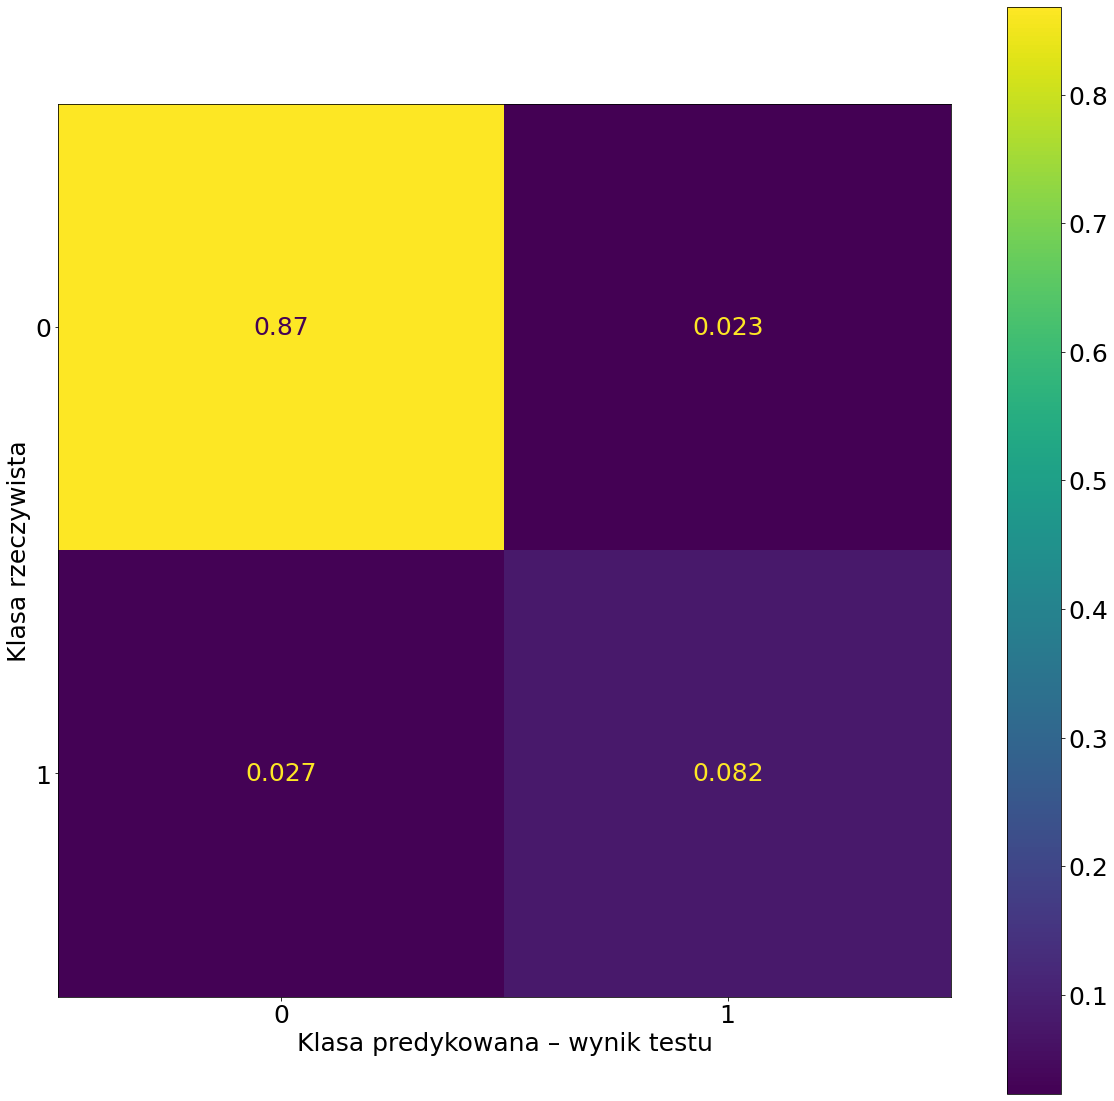

In [449]:
cm8 = confusion_matrix(target_test, y_pred8, normalize='all')

cm8_display = ConfusionMatrixDisplay(cm8).plot()
plt.xlabel('Klasa predykowana – wynik testu')
plt.ylabel('Klasa rzeczywista')
plt.show()

In [450]:
end = time.time()
time8 =end-start
time8

35.10484075546265

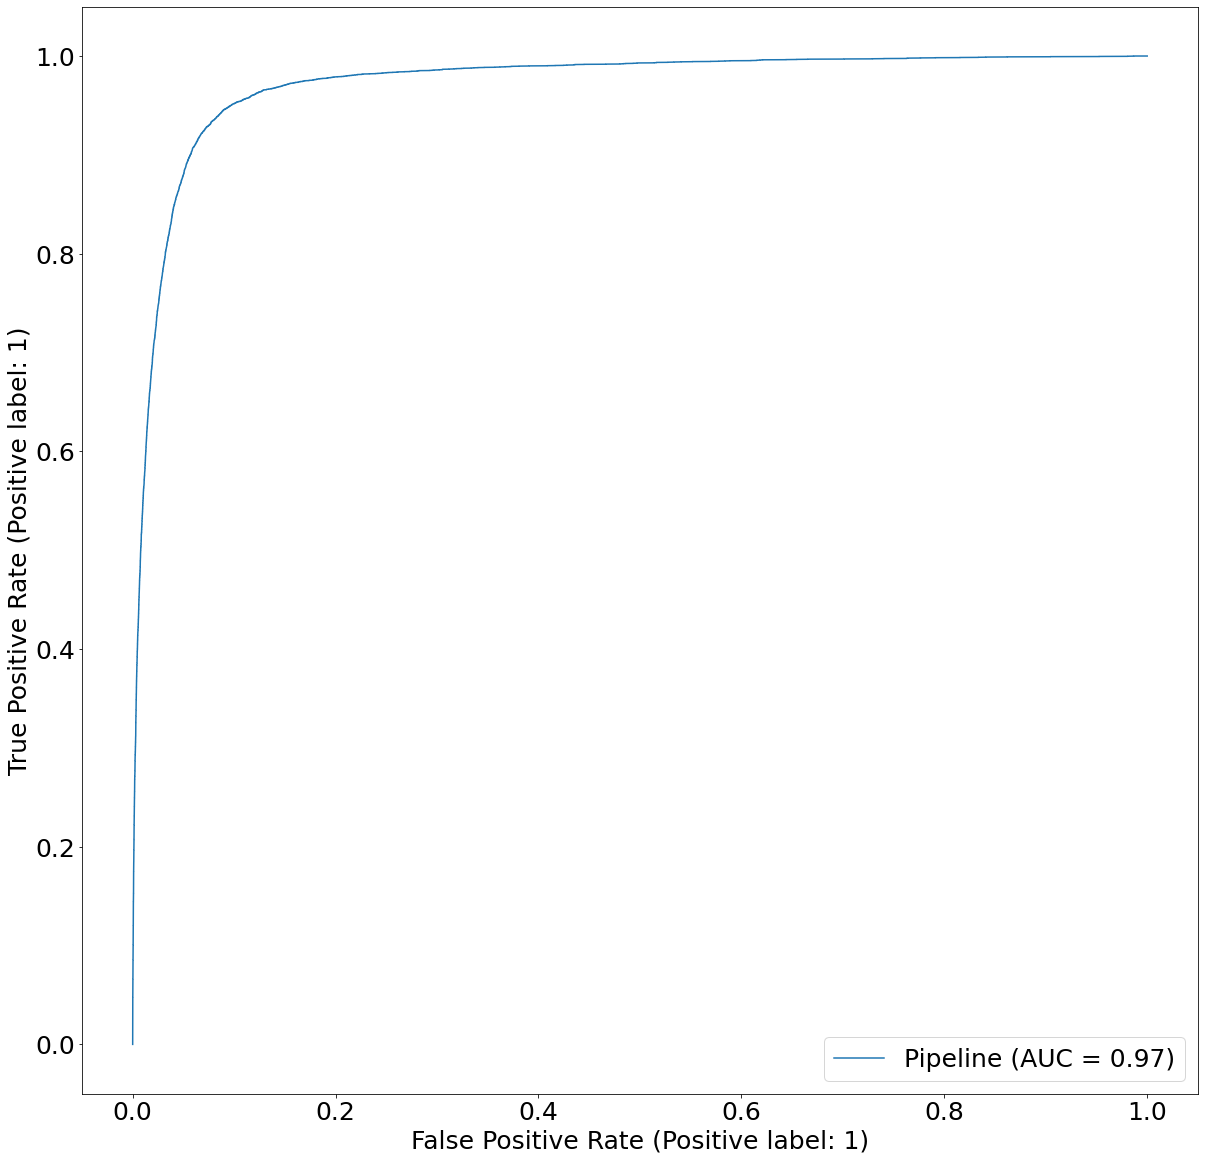

In [451]:
RocCurveDisplay.from_estimator(model8, data_test, target_test)
plt.show()

In [462]:
end = time.time()
time9 =end-start
time9

4.414139747619629

# MLPClassifier

In [463]:
from sklearn.neural_network import MLPClassifier

In [464]:
model10 = make_pipeline(preprocessor, MLPClassifier(max_iter=500, activation='identity'))

In [465]:
start = time.time()

In [466]:
model10 = model10.fit(data_train, target_train)

In [467]:
y_pred10=model10.predict(data_test)
model10.predict(data_test)[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [468]:
target_test[:10]

185609    0
56081     0
142215    0
302354    0
143385    1
245157    0
236696    0
341575    0
16193     0
257609    0
Name: PRZYPADKOWE_CZY_CELOWE, dtype: int64

In [469]:
model10.score(data_test, target_test)

0.9445939857441573

In [470]:
print("Accuracy:",accuracy_score(target_test, y_pred10))
print("Precision:",precision_score(target_test, y_pred10))
print("Recall:",recall_score(target_test, y_pred10))
print("F1:",f1_score(target_test, y_pred10))

Accuracy: 0.9445939857441573
Precision: 0.7458368915456874
Recall: 0.7431397574984046
F1: 0.7444858817261588


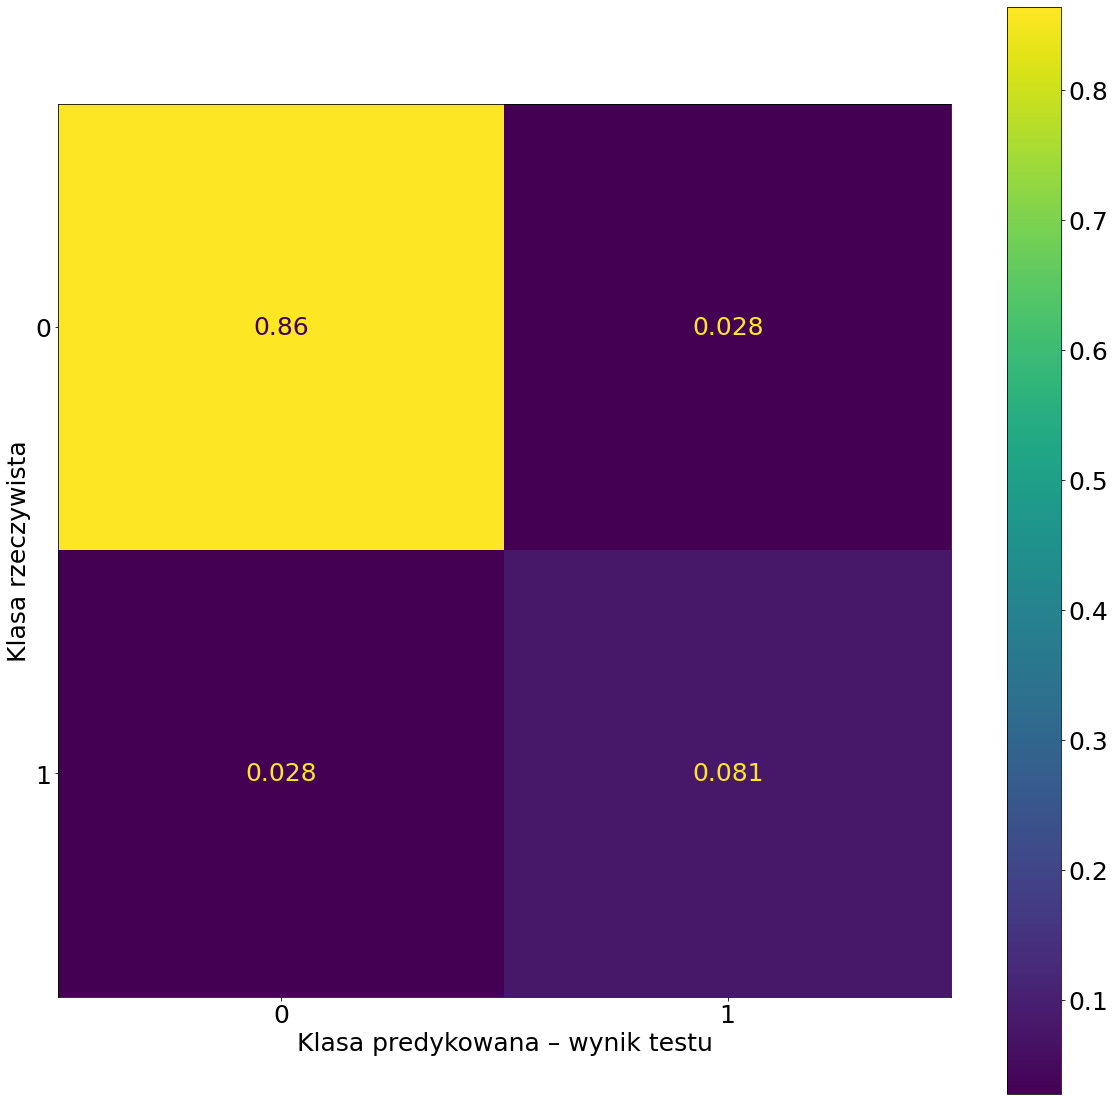

In [471]:
cm10 = confusion_matrix(target_test, y_pred10, normalize='all')

cm10_display = ConfusionMatrixDisplay(cm10).plot()
plt.xlabel('Klasa predykowana – wynik testu')
plt.ylabel('Klasa rzeczywista')
plt.show()

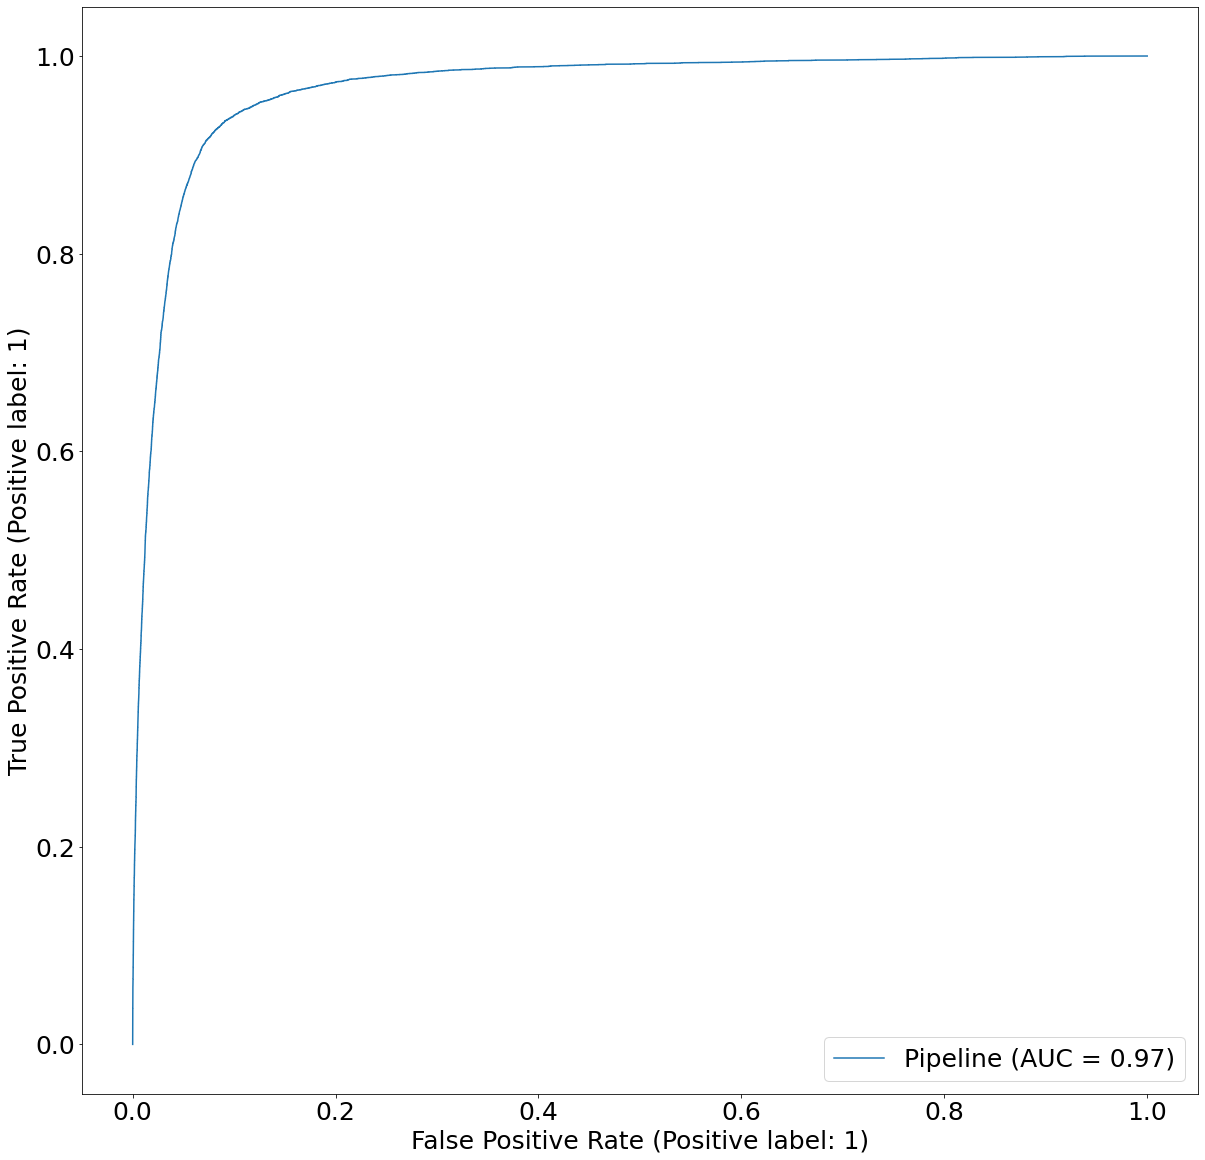

In [472]:
RocCurveDisplay.from_estimator(model10, data_test, target_test)
plt.show()

In [473]:
end = time.time()
time10 =end-start
time10

35.25692415237427

# PODSUMOWANIE

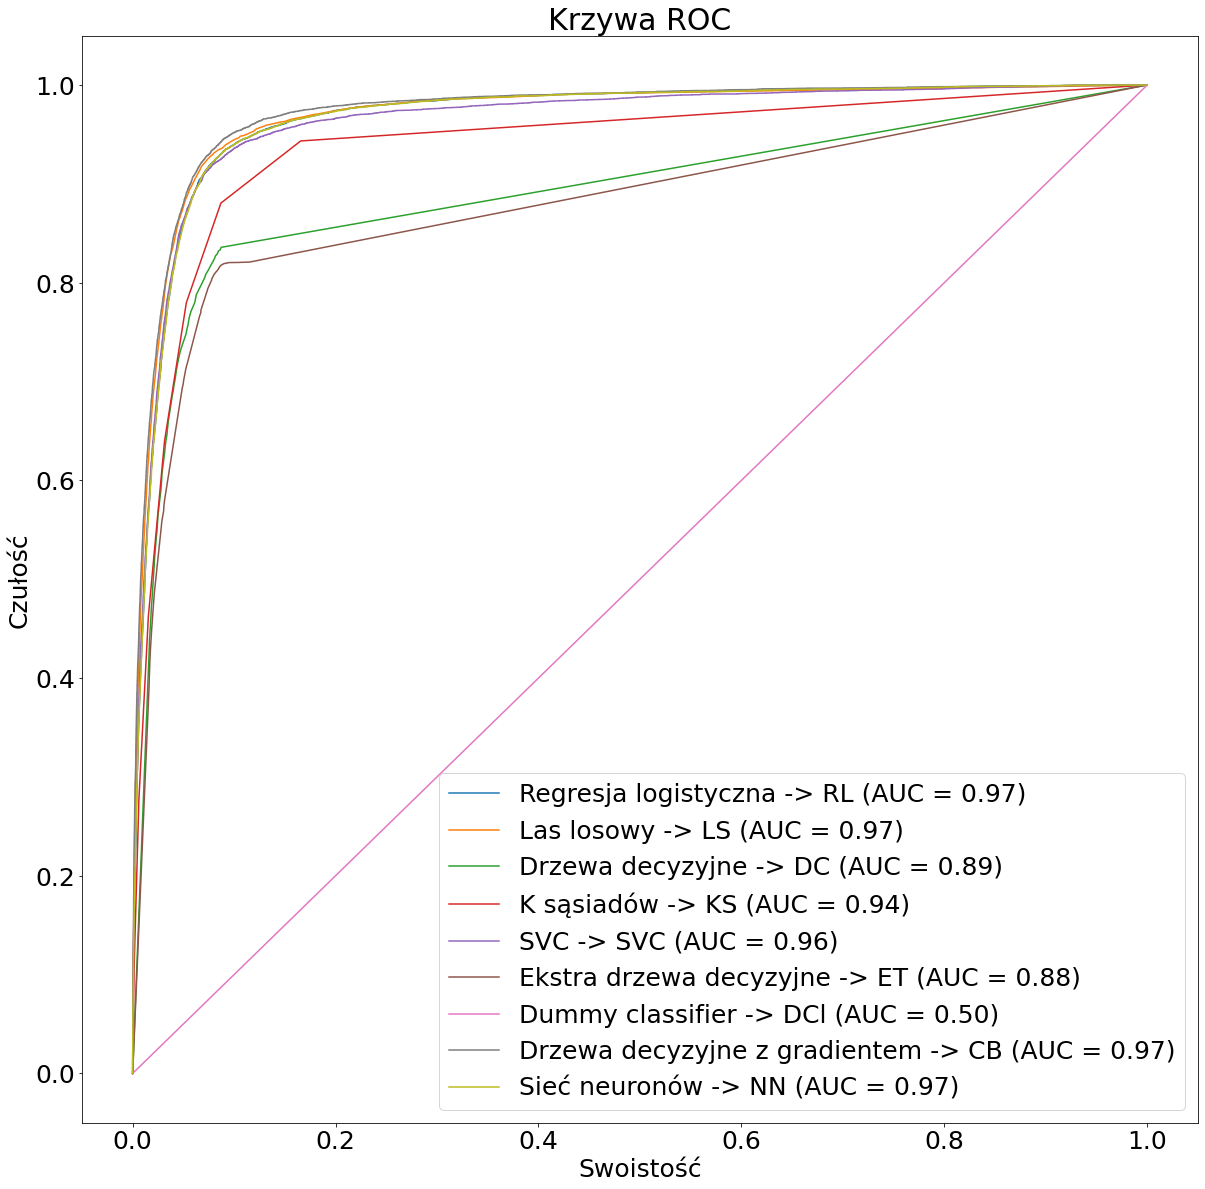

In [476]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("Regresja logistyczna -> RL", model),
    ("Las losowy -> LS", model2),
    ("Drzewa decyzyjne -> DC", model3),
    ("K sąsiadów -> KS", model4),
    ("SVC -> SVC", model5),
    ("Ekstra drzewa decyzyjne -> ET", model6),
    ("Dummy classifier -> DCl", model7),
    ("Drzewa decyzyjne z gradientem -> CB", model8),
    ("Sieć neuronów -> NN", model10)
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, data_test, target_test, ax=ax, name=name
    )
_ = ax.set_title("Krzywa ROC")
plt.xlabel('Swoistość')
plt.ylabel('Czułość')
plt.show()